I. Introduction

Social media is becoming a trends nowadays. Understanding the engagement in short-form media is crucial to have a good roadmap in increasing the popularity in social media. In this notebook, the aiming is finding the current trends, to interprete the most effective engagement metrics and to provide a good map to improve the efficiency and accurate in near future media plan.

II. Objectives

1. EDA the dataset (shorts_vs_tiktok)
2. Top 10 most engagemen profiles?
3. Top 10 hastags with most views?
4. Top 10 hastags with most likes?
5. Trend Identification & Analysis
    Objective: To identify the key trends in short-form video consumption across different countries and platforms.
    Expected outcome: A clear understanding of the most active and fastest-growing markets for short-form video.

6. Engagement Metrics Interpretation
    Objective: To determine which engagement metrics are most predictive of video popularity and virality.
    Expected outcome: An interpretation of which metrics (e.g., shares vs. likes) are the strongest indicators of a video's success, providing actionable insights for content creators.

7. Creator and Content Strategy
    Objective: To provide a data-driven roadmap for improving media efficiency and accuracy.
    Expected outcome: A set of actionable recommendations for a media plan, such as "Focus on content in [Category X] and collaborate with creators in the [Y Tier] to maximize engagement."

III. Preparation


In [100]:
## Import library
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

# Import my utils
from utils import *

# Set working directory
for pathname, dirname, filenames in os.walk('Dataset'):
    for filename in filenames:
        if filename.endswith('.csv'):
            print("Found csv file:", os.path.join(pathname, filename))

#Link dataset :https://www.kaggle.com/datasets/tarekmasryo/youtube-shorts-and-tiktok-trends-2025?select=DATA_DICTIONARY.csv


Found csv file: Dataset/monthly_trends_2025.csv
Found csv file: Dataset/youtube_shorts_tiktok_trends_2025.csv
Found csv file: Dataset/top_creators_impact_2025.csv
Found csv file: Dataset/country_platform_summary_2025.csv
Found csv file: Dataset/top_hashtags_2025.csv
Found csv file: Dataset/DATA_DICTIONARY.csv


In [101]:
# Load dataset
monthly_trends = pl.read_csv('Dataset/monthly_trends_2025.csv')
top_creators = pl.read_csv('Dataset/top_creators_impact_2025.csv')
top_hashtags = pl.read_csv('Dataset/top_hashtags_2025.csv')
shorts_vs_tiktok = pl.read_csv('Dataset/youtube_shorts_tiktok_trends_2025.csv')
platform_summary = pl.read_csv('Dataset/country_platform_summary_2025.csv')
Data_dictionary = pl.read_csv('Dataset/DATA_DICTIONARY.csv')


In [102]:
# Check null values
print("Null values in each dataset:")
display(monthly_trends.null_count().pipe(sum).item())
display(top_creators.null_count().pipe(sum).item())
display(top_hashtags.null_count().pipe(sum).item())
display(shorts_vs_tiktok.null_count().pipe(sum).item())
display(platform_summary.null_count().pipe(sum).item())
display(Data_dictionary.null_count().pipe(sum).item())
print("--- End of null value check ---\n")


Null values in each dataset:


0

0

0

0

0

0

--- End of null value check ---



The "DATA_DICTIONARY" includes various column names with their descriptions as follow:

In [103]:

# Display Dictionary
print("Data Dictionary:")
i = 1
Data_dictionary = Data_dictionary.sort('column')
for row in Data_dictionary.to_dicts():
    if i % 10 == 0:
        print('\n')
    print(f'{i}. Column "{row["column"]}" is "{row["description"]}"')
    i += 1
print("--- End of Data Dictionary ---")

Data Dictionary:
1. Column "author_handle" is "Creator handle/channel (brand-like, synthetic)"
2. Column "avg_watch_time_sec" is "Estimated average watch time (seconds)"
3. Column "category" is "Video category (if available)"
4. Column "comment_ratio" is "comments / views"
5. Column "comments" is "Comments count"
6. Column "completion_rate" is "avg_watch_time_sec / duration_sec"
7. Column "country" is "Country ISO-2 code"
8. Column "creator_avg_views" is "Avg views per video for the creator (across dataset rows)"
9. Column "creator_tier" is "Creator tier based on avg views: Micro / Mid / Macro / Star"


10. Column "device_brand" is "If mobile: device brand (iPhone, Samsung, Huawei, Xiaomi, Oppo, Vivo, Pixel, Other); Web ‚Üí Desktop"
11. Column "device_type" is "Android/iOS/Web"
12. Column "dislike_rate" is "dislikes / views"
13. Column "dislikes" is "Dislikes (synthetic, platform-aware)"
14. Column "duration_sec" is "Shorts-style duration in seconds (TikTok ~5‚Äì75, YouTube ~5‚Äì90)"
1

In [104]:
# Display schema of each dataset
print("Schema of each dataset:")
print("Monthly Trends Schema:")
display(monthly_trends.schema)
print('Shape size: ', monthly_trends.shape)
print("------------------------------\n")
print("Top Creators Schema:")
display(top_creators.schema)
print('Shape size: ', top_creators.shape)
print("------------------------------\n")
print("Top Hashtags Schema:")
display(top_hashtags.schema)
print('Shape size: ', top_hashtags.shape)
print("------------------------------\n")
print("Shorts vs TikTok Schema:")
display(shorts_vs_tiktok.schema)
print('Shape size: ', shorts_vs_tiktok.shape)
print("------------------------------\n")
print("Platform Summary Schema:")
display(platform_summary.schema)
print('Shape size: ', platform_summary.shape)
print("--- End of schema display ---\n")


Schema of each dataset:
Monthly Trends Schema:


Schema([('country', String),
        ('platform', String),
        ('year_month', String),
        ('n_videos', Int64),
        ('views', Int64),
        ('avg_er', Float64),
        ('avg_velocity', Float64),
        ('trend_label', String)])

Shape size:  (480, 8)
------------------------------

Top Creators Schema:


Schema([('author_handle', String),
        ('platform', String),
        ('n_videos', Int64),
        ('views', Int64),
        ('avg_er', Float64),
        ('likes_sum', Int64),
        ('dislikes_sum', Int64),
        ('comments_sum', Int64),
        ('shares_sum', Int64),
        ('saves_sum', Int64),
        ('total_engagements', Int64),
        ('avg_engagement_velocity', Float64),
        ('avg_comment_ratio', Float64),
        ('avg_share_rate', Float64),
        ('avg_save_rate', Float64),
        ('avg_like_dislike_ratio', Float64),
        ('avg_engagement_per_1k', Float64),
        ('avg_like_rate', Float64),
        ('avg_dislike_rate', Float64),
        ('creator_avg_views', Float64)])

Shape size:  (1000, 20)
------------------------------

Top Hashtags Schema:


Schema([('platform', String),
        ('hashtag', String),
        ('n_videos', Int64),
        ('views', Int64),
        ('likes', Int64),
        ('comments', Int64),
        ('shares', Int64),
        ('saves', Int64),
        ('avg_er', Float64),
        ('avg_engagement_velocity', Float64),
        ('avg_comment_ratio', Float64),
        ('avg_share_rate', Float64),
        ('avg_save_rate', Float64),
        ('avg_like_dislike_ratio', Float64),
        ('avg_engagement_per_1k', Float64),
        ('avg_like_rate', Float64),
        ('avg_dislike_rate', Float64),
        ('total_engagements', Int64)])

Shape size:  (82, 18)
------------------------------

Shorts vs TikTok Schema:


Schema([('platform', String),
        ('country', String),
        ('region', String),
        ('language', String),
        ('category', String),
        ('hashtag', String),
        ('title_keywords', String),
        ('author_handle', String),
        ('sound_type', String),
        ('music_track', String),
        ('week_of_year', Int64),
        ('duration_sec', Int64),
        ('views', Int64),
        ('likes', Int64),
        ('comments', Int64),
        ('shares', Int64),
        ('saves', Int64),
        ('engagement_rate', Float64),
        ('trend_label', String),
        ('source_hint', String),
        ('notes', String),
        ('device_type', String),
        ('upload_hour', Int64),
        ('genre', String),
        ('trend_duration_days', Int64),
        ('trend_type', String),
        ('engagement_velocity', Float64),
        ('dislikes', Int64),
        ('comment_ratio', Float64),
        ('share_rate', Float64),
        ('save_rate', Float64),
        ('like_dislik

Shape size:  (48079, 58)
------------------------------

Platform Summary Schema:


Schema([('country', String),
        ('platform', String),
        ('total_videos', Int64),
        ('total_views', Int64),
        ('median_er', Float64),
        ('p95_views', Float64),
        ('avg_duration', Float64),
        ('avg_velocity', Float64),
        ('avg_comment_ratio', Float64),
        ('avg_share_rate', Float64),
        ('avg_save_rate', Float64),
        ('avg_engagement_per_1k', Float64),
        ('top_hashtag', String),
        ('top_hashtag_views', Int64)])

Shape size:  (60, 14)
--- End of schema display ---



In [105]:
# Display first few rows of each dataset
print("First few rows of each dataset:")
display(monthly_trends.head(3))
display(top_creators.head(3))
display(top_hashtags.head(3))
display(shorts_vs_tiktok.head(3))
display(platform_summary.head(3))
print("--- End of dataset preview ---\n")


First few rows of each dataset:


shape: (3, 8)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ country ‚îÜ platform ‚îÜ year_month ‚îÜ n_videos ‚îÜ views    ‚îÜ avg_er   ‚îÜ avg_velocity ‚îÜ trend_label ‚îÇ
‚îÇ ---     ‚îÜ ---      ‚îÜ ---        ‚îÜ ---      ‚îÜ ---      ‚îÜ ---      ‚îÜ ---          ‚îÜ ---         ‚îÇ
‚îÇ str     ‚îÜ str      ‚îÜ str        ‚îÜ i64      ‚îÜ i64      ‚îÜ f64      ‚îÜ f64          ‚îÜ str         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ AE      ‚îÜ TikTok   ‚îÜ 2025-01    ‚îÜ 130      ‚îÜ 14474636 ‚îÜ 0.093197 ‚îÜ 18357.548923 ‚îÜ steady      ‚îÇ
‚îÇ AE      ‚îÜ TikTok   ‚îÜ 2025-02    ‚îÜ 112      ‚îÜ 11873208 ‚îÜ 0.092006 ‚îÜ 14471.823839 ‚îÜ declining   ‚îÇ
‚îÇ AE      ‚îÜ TikTok   ‚îÜ 2025-03    ‚îÜ 129      ‚îÜ 15551725 ‚îÜ 0.088624 ‚îÜ 15883.138605 ‚îÜ rising      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (3, 20)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ author_han ‚îÜ platform ‚îÜ n_videos ‚îÜ views    ‚îÜ ‚Ä¶ ‚îÜ avg_engage ‚îÜ avg_like_ ‚îÜ avg_disli ‚îÜ creator_a ‚îÇ
‚îÇ dle        ‚îÜ ---      ‚îÜ ---      ‚îÜ ---      ‚îÜ   ‚îÜ ment_per_1 ‚îÜ rate      ‚îÜ ke_rate   ‚îÜ vg_views  ‚îÇ
‚îÇ ---        ‚îÜ str      ‚îÜ i64      ‚îÜ i64      ‚îÜ   ‚îÜ k          ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ str        ‚îÜ          ‚îÜ          ‚îÜ          ‚îÜ   ‚îÜ ---        ‚îÜ f64       ‚îÜ f64       ‚îÜ f64       ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ          ‚îÜ          ‚îÜ   ‚îÜ f64        ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ UrbanVisio ‚îÜ TikTok   ‚îÜ 136      ‚îÜ 17938952 ‚îÜ ‚Ä¶ ‚îÜ 91.913699  ‚îÜ 0.070115  ‚îÜ 0.001887  ‚îÜ 120866.4  ‚îÇ
‚îÇ n          ‚îÜ          ‚îÜ          ‚îÜ          ‚îÜ   ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ BeyondStud ‚îÜ TikTok   ‚îÜ 135      ‚îÜ 17085072 ‚îÜ ‚Ä¶ ‚îÜ 87.915533  ‚îÜ 0.067256  ‚îÜ 0.001922  ‚îÜ 116192.9  ‚îÇ
‚îÇ io         ‚îÜ          ‚îÜ          ‚îÜ          ‚îÜ   ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ StreetVisi ‚îÜ TikTok   ‚îÜ 133      ‚îÜ 16843324 ‚îÜ ‚Ä¶ ‚îÜ 93.018098  ‚îÜ 0.071123  ‚îÜ 0.00187   ‚îÜ 116083.5  ‚îÇ
‚îÇ on         ‚îÜ          ‚îÜ          ‚îÜ          ‚îÜ   ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (3, 18)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ platform ‚îÜ hashtag ‚îÜ n_videos ‚îÜ views     ‚îÜ ‚Ä¶ ‚îÜ avg_engage ‚îÜ avg_like_r ‚îÜ avg_dislik ‚îÜ total_eng ‚îÇ
‚îÇ ---      ‚îÜ ---     ‚îÜ ---      ‚îÜ ---       ‚îÜ   ‚îÜ ment_per_1 ‚îÜ ate        ‚îÜ e_rate     ‚îÜ agements  ‚îÇ
‚îÇ str      ‚îÜ str     ‚îÜ i64      ‚îÜ i64       ‚îÜ   ‚îÜ k          ‚îÜ ---        ‚îÜ ---        ‚îÜ ---       ‚îÇ
‚îÇ          ‚îÜ         ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ ---        ‚îÜ f64        ‚îÜ f64        ‚îÜ i64       ‚îÇ
‚îÇ          ‚îÜ         ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ f64        ‚îÜ            ‚îÜ            ‚îÜ           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ TikTok   ‚îÜ #FYP    ‚îÜ 7379     ‚îÜ 734064265 ‚îÜ ‚Ä¶ ‚îÜ 91.837843  ‚îÜ 0.070141   ‚îÜ 0.001892   ‚îÜ 67400639  ‚îÇ
‚îÇ TikTok   ‚îÜ #GRWM   ‚îÜ 1013     ‚îÜ 111331419 ‚îÜ ‚Ä¶ ‚îÜ 91.319729  ‚îÜ 0.069833   ‚îÜ 0.001921   ‚îÜ 10099811  ‚îÇ
‚îÇ TikTok   ‚îÜ #Comedy ‚îÜ 762      ‚îÜ 79538424  ‚îÜ ‚Ä¶ ‚îÜ 92.76152   ‚îÜ 0.070627   ‚îÜ 0.001941   ‚îÜ 7528432   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (3, 58)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ platform ‚îÜ country ‚îÜ region ‚îÜ language ‚îÜ ‚Ä¶ ‚îÜ engagement_ ‚îÜ engagement_ ‚îÜ engagement ‚îÜ engagement ‚îÇ
‚îÇ ---      ‚îÜ ---     ‚îÜ ---    ‚îÜ ---      ‚îÜ   ‚îÜ per_1k      ‚îÜ like_rate   ‚îÜ _comment_r ‚îÜ _share_rat ‚îÇ
‚îÇ str      ‚îÜ str     ‚îÜ str    ‚îÜ str      ‚îÜ   ‚îÜ ---         ‚îÜ ---         ‚îÜ ate        ‚îÜ e          ‚îÇ
‚îÇ          ‚îÜ         ‚îÜ        ‚îÜ          ‚îÜ   ‚îÜ f64         ‚îÜ f64         ‚îÜ ---        ‚îÜ ---        ‚îÇ
‚îÇ          ‚îÜ         ‚îÜ        ‚îÜ          ‚îÜ   ‚îÜ             ‚îÜ             ‚îÜ f64        ‚îÜ f64        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ TikTok   ‚îÜ Jp      ‚îÜ Asia   ‚îÜ ja       ‚îÜ ‚Ä¶ ‚îÜ 120.069     ‚îÜ 0.086159    ‚îÜ 0.012555   ‚îÜ 0.00783    ‚îÇ
‚îÇ TikTok   ‚îÜ Se      ‚îÜ Europe ‚îÜ sv       ‚îÜ ‚Ä¶ ‚îÜ 113.005     ‚îÜ 0.085298    ‚îÜ 0.00785    ‚îÜ 0.007791   ‚îÇ
‚îÇ TikTok   ‚îÜ Za      ‚îÜ Africa ‚îÜ en       ‚îÜ ‚Ä¶ ‚îÜ 68.111      ‚îÜ 0.049154    ‚îÜ 0.004469   ‚îÜ 0.005146   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (3, 14)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ country ‚îÜ platform ‚îÜ total_vide ‚îÜ total_view ‚îÜ ‚Ä¶ ‚îÜ avg_save_ ‚îÜ avg_engag ‚îÜ top_hasht ‚îÜ top_hasht ‚îÇ
‚îÇ ---     ‚îÜ ---      ‚îÜ os         ‚îÜ s          ‚îÜ   ‚îÜ rate      ‚îÜ ement_per ‚îÜ ag        ‚îÜ ag_views  ‚îÇ
‚îÇ str     ‚îÜ str      ‚îÜ ---        ‚îÜ ---        ‚îÜ   ‚îÜ ---       ‚îÜ _1k       ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ         ‚îÜ          ‚îÜ i64        ‚îÜ i64        ‚îÜ   ‚îÜ f64       ‚îÜ ---       ‚îÜ str       ‚îÜ i64       ‚îÇ
‚îÇ         ‚îÜ          ‚îÜ            ‚îÜ            ‚îÜ   ‚îÜ           ‚îÜ f64       ‚îÜ           ‚îÜ           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Ae      ‚îÜ TikTok   ‚îÜ 1017       ‚îÜ 102064271  ‚îÜ ‚Ä¶ ‚îÜ 0.0072    ‚îÜ 92.4015   ‚îÜ #FYP      ‚îÜ 26292844  ‚îÇ
‚îÇ Ae      ‚îÜ YouTube  ‚îÜ 641        ‚îÜ 67638733   ‚îÜ ‚Ä¶ ‚îÜ 0.004     ‚îÜ 51.2265   ‚îÜ #FYP      ‚îÜ 18272805  ‚îÇ
‚îÇ Ar      ‚îÜ TikTok   ‚îÜ 1032       ‚îÜ 103715112  ‚îÜ ‚Ä¶ ‚îÜ 0.0071    ‚îÜ 90.0953   ‚îÜ #FYP      ‚îÜ 27220930  ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

--- End of dataset preview ---



In [106]:
# Display summary statistics of each dataset
print("Summary statistics of each dataset:")
display(monthly_trends.describe())
display(top_creators.describe())
display(top_hashtags.describe())
display(shorts_vs_tiktok.describe())
display(platform_summary.describe())
print("--- End of summary statistics ---\n")


Summary statistics of each dataset:


shape: (9, 9)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ country ‚îÜ platform ‚îÜ year_month ‚îÜ ‚Ä¶ ‚îÜ views      ‚îÜ avg_er   ‚îÜ avg_veloc ‚îÜ trend_lab ‚îÇ
‚îÇ ---        ‚îÜ ---     ‚îÜ ---      ‚îÜ ---        ‚îÜ   ‚îÜ ---        ‚îÜ ---      ‚îÜ ity       ‚îÜ el        ‚îÇ
‚îÇ str        ‚îÜ str     ‚îÜ str      ‚îÜ str        ‚îÜ   ‚îÜ f64        ‚îÜ f64      ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ f64       ‚îÜ str       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 480     ‚îÜ 480      ‚îÜ 480        ‚îÜ ‚Ä¶ ‚îÜ 480.0      ‚îÜ 480.0    ‚îÜ 480.0     ‚îÜ 480       ‚îÇ
‚îÇ null_count ‚îÜ 0       ‚îÜ 0        ‚îÜ 0          ‚îÜ ‚Ä¶ ‚îÜ 0.0        ‚îÜ 0.0      ‚îÜ 0.0       ‚îÜ 0         ‚îÇ
‚îÇ mean       ‚îÜ null    ‚îÜ null     ‚îÜ null       ‚îÜ ‚Ä¶ ‚îÜ 9.9456e6   ‚îÜ 0.071325 ‚îÜ 13827.294 ‚îÜ null      ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ 022       ‚îÜ           ‚îÇ
‚îÇ std        ‚îÜ null    ‚îÜ null     ‚îÜ null       ‚îÜ ‚Ä¶ ‚îÜ 2.7228e6   ‚îÜ 0.020566 ‚îÜ 2576.2106 ‚îÜ null      ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ 52        ‚îÜ           ‚îÇ
‚îÇ min        ‚îÜ AE      ‚îÜ TikTok   ‚îÜ 2025-01    ‚îÜ ‚Ä¶ ‚îÜ 4.402922e6 ‚îÜ 0.046267 ‚îÜ 8127.4235 ‚îÜ declining ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ 16        ‚îÜ           ‚îÇ
‚îÇ 25%        ‚îÜ null    ‚îÜ null     ‚îÜ null       ‚îÜ ‚Ä¶ ‚îÜ 7.746645e6 ‚îÜ 0.050687 ‚îÜ 11922.079 ‚îÜ null      ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ 773       ‚îÜ           ‚îÇ
‚îÇ 50%        ‚îÜ null    ‚îÜ null     ‚îÜ null       ‚îÜ ‚Ä¶ ‚îÜ 9.758886e6 ‚îÜ 0.085923 ‚îÜ 13520.303 ‚îÜ null      ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ          ‚îÜ 509       ‚îÜ           ‚îÇ
‚îÇ 75%        ‚îÜ null    ‚îÜ null     ‚îÜ null       ‚îÜ ‚Ä¶ ‚îÜ 1.1892837e ‚îÜ 0.091783 ‚îÜ 15502.540 ‚îÜ null      ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ 7          ‚îÜ          ‚îÜ 476       ‚îÜ           ‚îÇ
‚îÇ max        ‚îÜ ZA      ‚îÜ YouTube  ‚îÜ 2025-08    ‚îÜ ‚Ä¶ ‚îÜ 1.8611773e ‚îÜ 0.096982 ‚îÜ 23553.853 ‚îÜ steady    ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ 7          ‚îÜ          ‚îÜ 889       ‚îÜ           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (9, 21)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic ‚îÜ author_ha ‚îÜ platform ‚îÜ n_videos  ‚îÜ ‚Ä¶ ‚îÜ avg_engag ‚îÜ avg_like_ ‚îÜ avg_disli ‚îÜ creator_a ‚îÇ
‚îÇ ---       ‚îÜ ndle      ‚îÜ ---      ‚îÜ ---       ‚îÜ   ‚îÜ ement_per ‚îÜ rate      ‚îÜ ke_rate   ‚îÜ vg_views  ‚îÇ
‚îÇ str       ‚îÜ ---       ‚îÜ str      ‚îÜ f64       ‚îÜ   ‚îÜ _1k       ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ           ‚îÜ str       ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ ---       ‚îÜ f64       ‚îÜ f64       ‚îÜ f64       ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ f64       ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count     ‚îÜ 1000      ‚îÜ 1000     ‚îÜ 1000.0    ‚îÜ ‚Ä¶ ‚îÜ 1000.0    ‚îÜ 1000.0    ‚îÜ 1000.0    ‚îÜ 1000.0    ‚îÇ
‚îÇ null_coun ‚îÜ 0         ‚îÜ 0        ‚îÜ 0.0       ‚îÜ ‚Ä¶ ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 0.0       ‚îÇ
‚îÇ t         ‚îÜ           ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ mean      ‚îÜ null      ‚îÜ null     ‚îÜ 42.465    ‚îÜ ‚Ä¶ ‚îÜ 75.878799 ‚îÜ 0.05796   ‚îÜ 0.002449  ‚îÜ 102532.15 ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ 7         ‚îÇ
‚îÇ std       ‚îÜ null      ‚îÜ null     ‚îÜ 26.342869 ‚îÜ ‚Ä¶ ‚îÜ 20.263305 ‚îÜ 0.015464  ‚îÜ 0.000713  ‚îÜ 17963.350 ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ 671       ‚îÇ
‚îÇ min       ‚îÜ Ahmed     ‚îÜ TikTok   ‚îÜ 9.0       ‚îÜ ‚Ä¶ ‚îÜ 42.553286 ‚îÜ 0.032481  ‚îÜ 0.001307  ‚îÜ 62987.8   ‚îÇ
‚îÇ 25%       ‚îÜ null      ‚îÜ null     ‚îÜ 24.0      ‚îÜ ‚Ä¶ ‚îÜ 51.74429  ‚îÜ 0.03962   ‚îÜ 0.001878  ‚îÜ 90488.4   ‚îÇ
‚îÇ 50%       ‚îÜ null      ‚îÜ null     ‚îÜ 32.0      ‚îÜ ‚Ä¶ ‚îÜ 88.199115 ‚îÜ 0.067235  ‚îÜ 0.002076  ‚îÜ 99969.1   ‚îÇ
‚îÇ 75%       ‚îÜ null      ‚îÜ null     ‚îÜ 56.0      ‚îÜ ‚Ä¶ ‚îÜ 92.5193   ‚îÜ 0.0708    ‚îÜ 0.003185  ‚îÜ 111410.3  ‚îÇ
‚îÇ max       ‚îÜ YukiYT    ‚îÜ YouTube  ‚îÜ 148.0     ‚îÜ ‚Ä¶ ‚îÜ 108.45347 ‚îÜ 0.08284   ‚îÜ 0.004324  ‚îÜ 222935.4  ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ 6         ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (9, 19)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ platform ‚îÜ hashtag  ‚îÜ n_videos  ‚îÜ ‚Ä¶ ‚îÜ avg_engag ‚îÜ avg_like_ ‚îÜ avg_disli ‚îÜ total_eng ‚îÇ
‚îÇ ---        ‚îÜ ---      ‚îÜ ---      ‚îÜ ---       ‚îÜ   ‚îÜ ement_per ‚îÜ rate      ‚îÜ ke_rate   ‚îÜ agements  ‚îÇ
‚îÇ str        ‚îÜ str      ‚îÜ str      ‚îÜ f64       ‚îÜ   ‚îÜ _1k       ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ ---       ‚îÜ f64       ‚îÜ f64       ‚îÜ f64       ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ f64       ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 82       ‚îÜ 82       ‚îÜ 82.0      ‚îÜ ‚Ä¶ ‚îÜ 82.0      ‚îÜ 82.0      ‚îÜ 82.0      ‚îÜ 82.0      ‚îÇ
‚îÇ null_count ‚îÜ 0        ‚îÜ 0        ‚îÜ 0.0       ‚îÜ ‚Ä¶ ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 0.0       ‚îÇ
‚îÇ mean       ‚îÜ null     ‚îÜ null     ‚îÜ 606.14634 ‚îÜ ‚Ä¶ ‚îÜ 71.252388 ‚îÜ 0.054446  ‚îÜ 0.002607  ‚îÜ 4.5529e6  ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ          ‚îÜ 1         ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ std        ‚îÜ null     ‚îÜ null     ‚îÜ 923.11777 ‚îÜ ‚Ä¶ ‚îÜ 20.539576 ‚îÜ 0.015679  ‚îÜ 0.000688  ‚îÜ 7.7087e6  ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ          ‚îÜ 3         ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îÇ min        ‚îÜ TikTok   ‚îÜ #AI      ‚îÜ 26.0      ‚îÜ ‚Ä¶ ‚îÜ 48.970571 ‚îÜ 0.037644  ‚îÜ 0.001806  ‚îÜ 126896.0  ‚îÇ
‚îÇ 25%        ‚îÜ null     ‚îÜ null     ‚îÜ 370.0     ‚îÜ ‚Ä¶ ‚îÜ 50.901968 ‚îÜ 0.038811  ‚îÜ 0.001932  ‚îÜ 1.887284e ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ 6         ‚îÇ
‚îÇ 50%        ‚îÜ null     ‚îÜ null     ‚îÜ 494.0     ‚îÜ ‚Ä¶ ‚îÜ 83.717531 ‚îÜ 0.063903  ‚îÜ 0.003102  ‚îÜ 3.013397e ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ 6         ‚îÇ
‚îÇ 75%        ‚îÜ null     ‚îÜ null     ‚îÜ 583.0     ‚îÜ ‚Ä¶ ‚îÜ 91.699072 ‚îÜ 0.070086  ‚îÜ 0.003268  ‚îÜ 5.303778e ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ 6         ‚îÇ
‚îÇ max        ‚îÜ YouTube  ‚îÜ #Workout ‚îÜ 7379.0    ‚îÜ ‚Ä¶ ‚îÜ 95.668146 ‚îÜ 0.073752  ‚îÜ 0.003712  ‚îÜ 6.7400639 ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ          ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ e7        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (9, 59)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ platform ‚îÜ country ‚îÜ region     ‚îÜ ‚Ä¶ ‚îÜ engagemen ‚îÜ engagemen ‚îÜ engagemen ‚îÜ engagemen ‚îÇ
‚îÇ ---        ‚îÜ ---      ‚îÜ ---     ‚îÜ ---        ‚îÜ   ‚îÜ t_per_1k  ‚îÜ t_like_ra ‚îÜ t_comment ‚îÜ t_share_r ‚îÇ
‚îÇ str        ‚îÜ str      ‚îÜ str     ‚îÜ str        ‚îÜ   ‚îÜ ---       ‚îÜ te        ‚îÜ _rate     ‚îÜ ate       ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ         ‚îÜ            ‚îÜ   ‚îÜ f64       ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ         ‚îÜ            ‚îÜ   ‚îÜ           ‚îÜ f64       ‚îÜ f64       ‚îÜ f64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 48079    ‚îÜ 48079   ‚îÜ 48079      ‚îÜ ‚Ä¶ ‚îÜ 48079.0   ‚îÜ 48079.0   ‚îÜ 48079.0   ‚îÜ 48079.0   ‚îÇ
‚îÇ null_count ‚îÜ 0        ‚îÜ 0       ‚îÜ 0          ‚îÜ ‚Ä¶ ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 0.0       ‚îÇ
‚îÇ mean       ‚îÜ null     ‚îÜ null    ‚îÜ null       ‚îÜ ‚Ä¶ ‚îÜ 75.415322 ‚îÜ 0.057607  ‚îÜ 0.00631   ‚îÜ 0.005556  ‚îÇ
‚îÇ std        ‚îÜ null     ‚îÜ null    ‚îÜ null       ‚îÜ ‚Ä¶ ‚îÜ 30.090519 ‚îÜ 0.023123  ‚îÜ 0.002969  ‚îÜ 0.002496  ‚îÇ
‚îÇ min        ‚îÜ TikTok   ‚îÜ Ae      ‚îÜ Africa     ‚îÜ ‚Ä¶ ‚îÜ 14.72     ‚îÜ 0.011792  ‚îÜ 0.000975  ‚îÜ 0.000735  ‚îÇ
‚îÇ 25%        ‚îÜ null     ‚îÜ null    ‚îÜ null       ‚îÜ ‚Ä¶ ‚îÜ 52.326    ‚îÜ 0.039941  ‚îÜ 0.004058  ‚îÜ 0.00367   ‚îÇ
‚îÇ 50%        ‚îÜ null     ‚îÜ null    ‚îÜ null       ‚îÜ ‚Ä¶ ‚îÜ 71.575    ‚îÜ 0.054654  ‚îÜ 0.005809  ‚îÜ 0.005163  ‚îÇ
‚îÇ 75%        ‚îÜ null     ‚îÜ null    ‚îÜ null       ‚îÜ ‚Ä¶ ‚îÜ 94.797    ‚îÜ 0.072282  ‚îÜ 0.008016  ‚îÜ 0.007     ‚îÇ
‚îÇ max        ‚îÜ YouTube  ‚îÜ Za      ‚îÜ South      ‚îÜ ‚Ä¶ ‚îÜ 235.819   ‚îÜ 0.1853    ‚îÜ 0.023668  ‚îÜ 0.020328  ‚îÇ
‚îÇ            ‚îÜ          ‚îÜ         ‚îÜ America    ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (9, 15)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic  ‚îÜ country ‚îÜ platform ‚îÜ total_vide ‚îÜ ‚Ä¶ ‚îÜ avg_save_ ‚îÜ avg_engag ‚îÜ top_hasht ‚îÜ top_hasht ‚îÇ
‚îÇ ---        ‚îÜ ---     ‚îÜ ---      ‚îÜ os         ‚îÜ   ‚îÜ rate      ‚îÜ ement_per ‚îÜ ag        ‚îÜ ag_views  ‚îÇ
‚îÇ str        ‚îÜ str     ‚îÜ str      ‚îÜ ---        ‚îÜ   ‚îÜ ---       ‚îÜ _1k       ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ f64        ‚îÜ   ‚îÜ f64       ‚îÜ ---       ‚îÜ str       ‚îÜ f64       ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ           ‚îÜ f64       ‚îÜ           ‚îÜ           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 60      ‚îÜ 60       ‚îÜ 60.0       ‚îÜ ‚Ä¶ ‚îÜ 60.0      ‚îÜ 60.0      ‚îÜ 60        ‚îÜ 60.0      ‚îÇ
‚îÇ null_count ‚îÜ 0       ‚îÜ 0        ‚îÜ 0.0        ‚îÜ ‚Ä¶ ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 0         ‚îÜ 0.0       ‚îÇ
‚îÇ mean       ‚îÜ null    ‚îÜ null     ‚îÜ 828.4      ‚îÜ ‚Ä¶ ‚îÜ 0.00562   ‚îÜ 71.333512 ‚îÜ null      ‚îÜ 2.0417e7  ‚îÇ
‚îÇ std        ‚îÜ null    ‚îÜ null     ‚îÜ 170.134961 ‚îÜ ‚Ä¶ ‚îÜ 0.001616  ‚îÜ 20.648183 ‚îÜ null      ‚îÜ 4.8638e6  ‚îÇ
‚îÇ min        ‚îÜ Ae      ‚îÜ TikTok   ‚îÜ 622.0      ‚îÜ ‚Ä¶ ‚îÜ 0.0039    ‚îÜ 49.995    ‚îÜ #FYP      ‚îÜ 1.1677229 ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ e7        ‚îÇ
‚îÇ 25%        ‚îÜ null    ‚îÜ null     ‚îÜ 658.0      ‚îÜ ‚Ä¶ ‚îÜ 0.004     ‚îÜ 50.8593   ‚îÜ null      ‚îÜ 1.6038509 ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ e7        ‚îÇ
‚îÇ 50%        ‚îÜ null    ‚îÜ null     ‚îÜ 921.0      ‚îÜ ‚Ä¶ ‚îÜ 0.007     ‚îÜ 90.0953   ‚îÜ null      ‚îÜ 2.052802e ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ 7         ‚îÇ
‚îÇ 75%        ‚îÜ null    ‚îÜ null     ‚îÜ 989.0      ‚îÜ ‚Ä¶ ‚îÜ 0.0072    ‚îÜ 91.808    ‚îÜ null      ‚îÜ 2.4506073 ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ e7        ‚îÇ
‚îÇ max        ‚îÜ Za      ‚îÜ YouTube  ‚îÜ 1068.0     ‚îÜ ‚Ä¶ ‚îÜ 0.0075    ‚îÜ 93.0037   ‚îÜ #FYP      ‚îÜ 3.0145268 ‚îÇ
‚îÇ            ‚îÜ         ‚îÜ          ‚îÜ            ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ e7        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

--- End of summary statistics ---



Exploratory Data Analysis (EDA) of the shorts_vs_tiktok dataset:
Data types after conversion:


Schema([('platform', String),
        ('country', String),
        ('region', String),
        ('language', String),
        ('category', String),
        ('hashtag', String),
        ('title_keywords', String),
        ('author_handle', String),
        ('sound_type', String),
        ('music_track', String),
        ('week_of_year', Int64),
        ('duration_sec', Int64),
        ('views', Int64),
        ('likes', Int64),
        ('comments', Int64),
        ('shares', Int64),
        ('saves', Int64),
        ('engagement_rate', Float64),
        ('trend_label', String),
        ('source_hint', String),
        ('notes', String),
        ('device_type', String),
        ('upload_hour', Int64),
        ('genre', String),
        ('trend_duration_days', Int64),
        ('trend_type', String),
        ('engagement_velocity', Float64),
        ('dislikes', Int64),
        ('comment_ratio', Float64),
        ('share_rate', Float64),
        ('save_rate', Float64),
        ('like_dislik

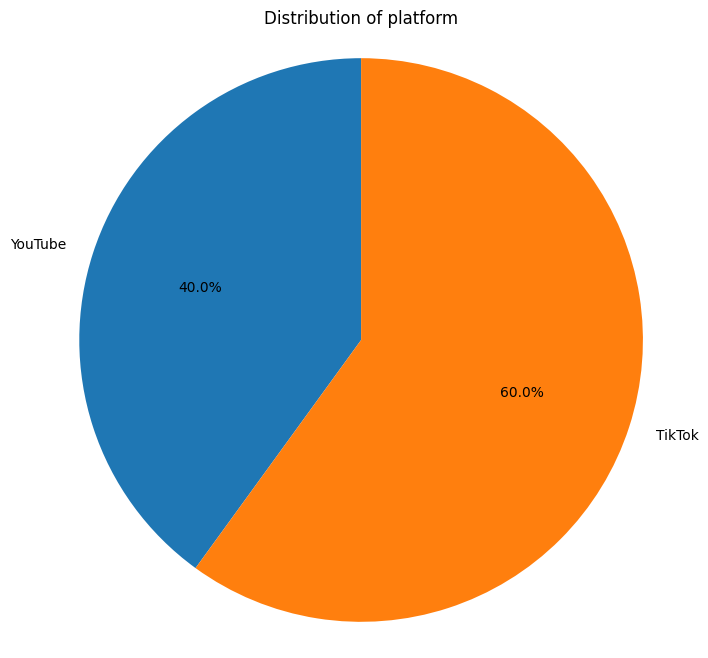

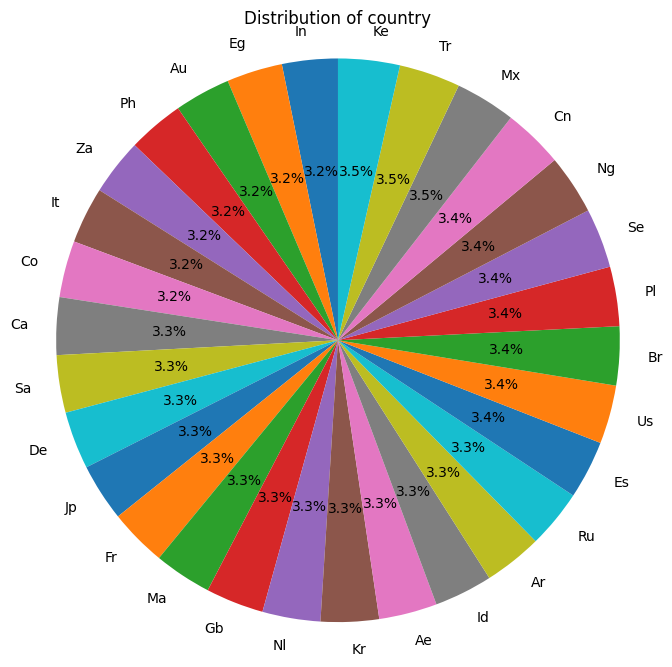

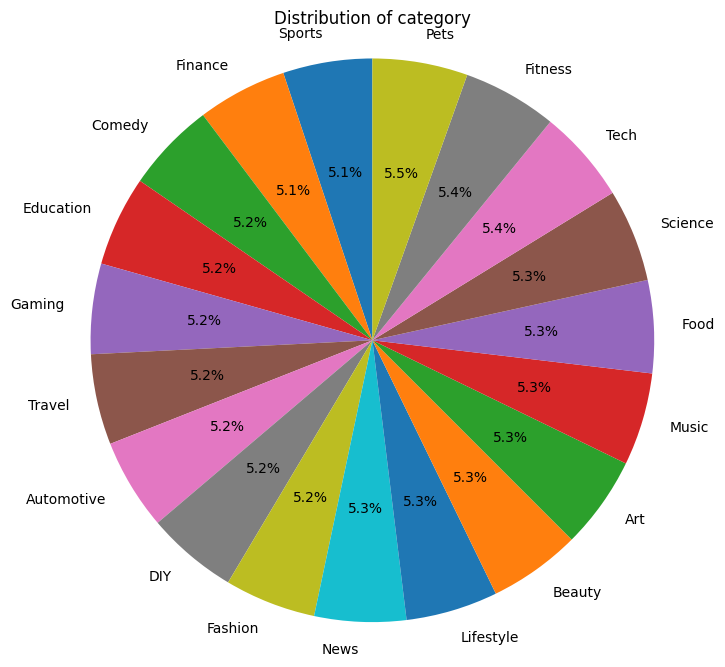

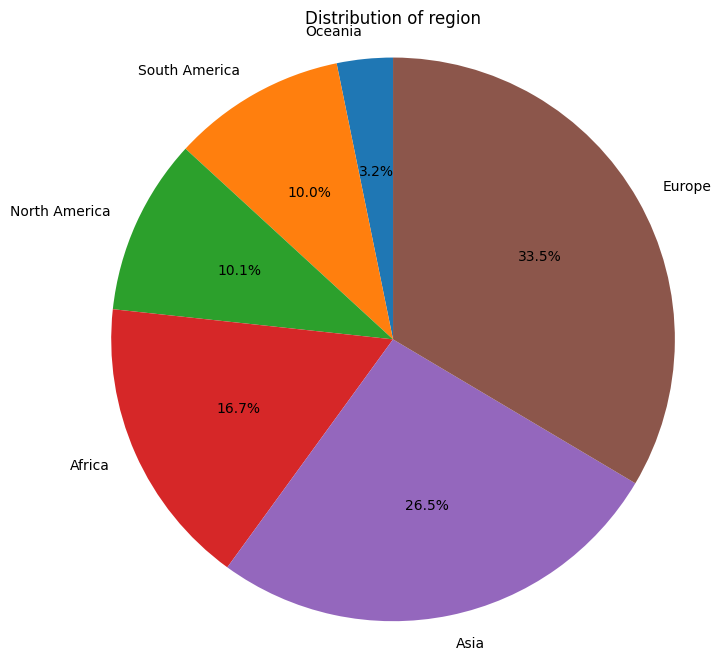

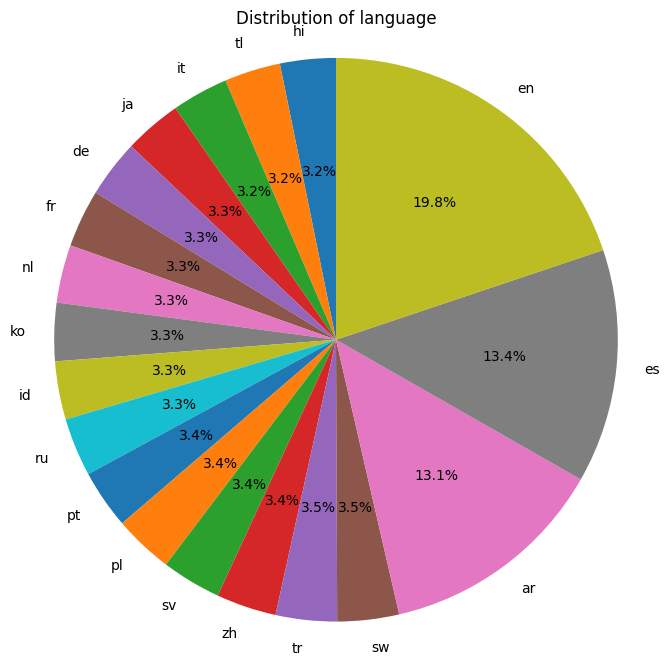

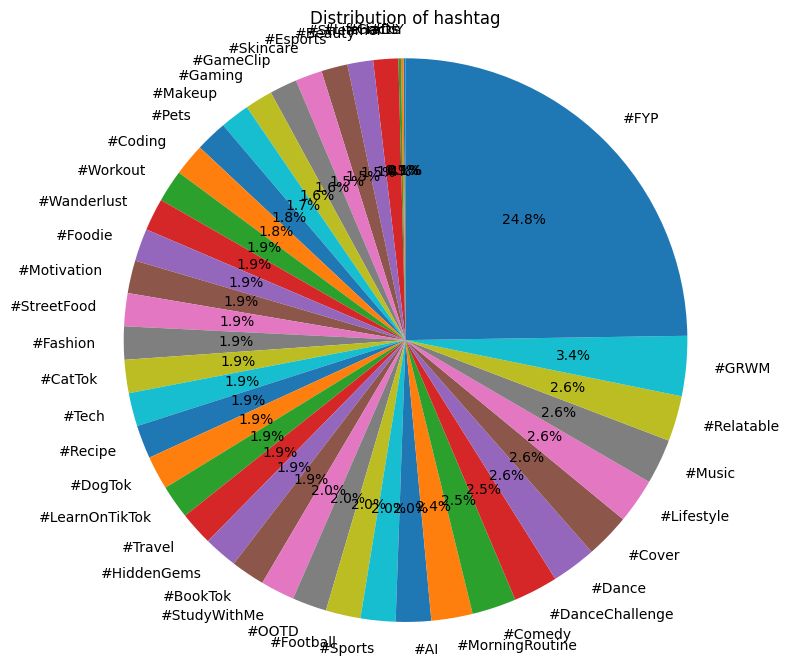

--- End of EDA ---



In [107]:
# EDA the dataset (shorts_vs_tiktok)
# Objective: To explore the dataset and understand the distribution of key metrics across different platforms and countries.
# What you'll do: Use descriptive statistics and visualizations to analyze the distribution of views, likes, comments, shares, and completion rates across YouTube Shorts and TikTok. You can create histograms, box plots, and scatter plots to visualize these distributions.
# Expected outcome: A comprehensive overview of how engagement metrics vary between the two platforms and across different countries.
print("Exploratory Data Analysis (EDA) of the shorts_vs_tiktok dataset:")
# Change format of date columns
shorts_vs_tiktok = shorts_vs_tiktok.with_columns([
    pl.col("publish_date_approx").str.strptime(pl.Date, "%Y-%m-%d"),
    pl.col("year_month").str.strptime(pl.Date, "%Y-%m")
])
print("Data types after conversion:")
display(shorts_vs_tiktok.schema)
    
piechart_sns(shorts_vs_tiktok, 'platform')
piechart_sns(shorts_vs_tiktok, 'country')
piechart_sns(shorts_vs_tiktok, 'category')
piechart_sns(shorts_vs_tiktok, 'region')
piechart_sns(shorts_vs_tiktok, 'language')
piechart_sns(shorts_vs_tiktok, 'hashtag')

print("--- End of EDA ---\n")

Displaying the distribution of float64 columns in shorts_vs_tiktok dataset.


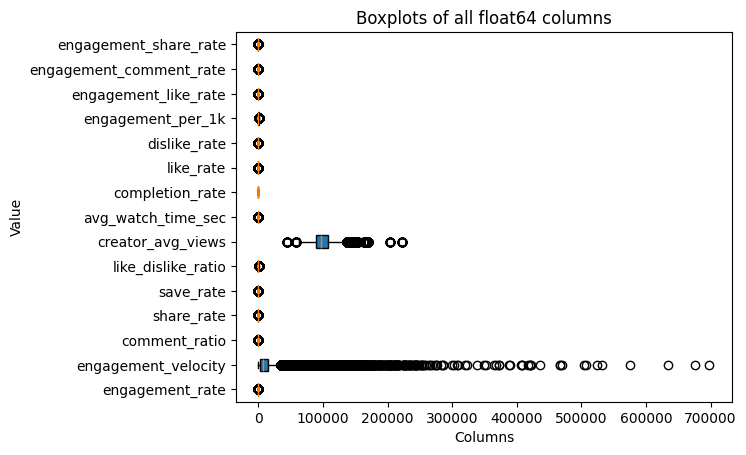

There are 15 float64 columns in the df dataset.


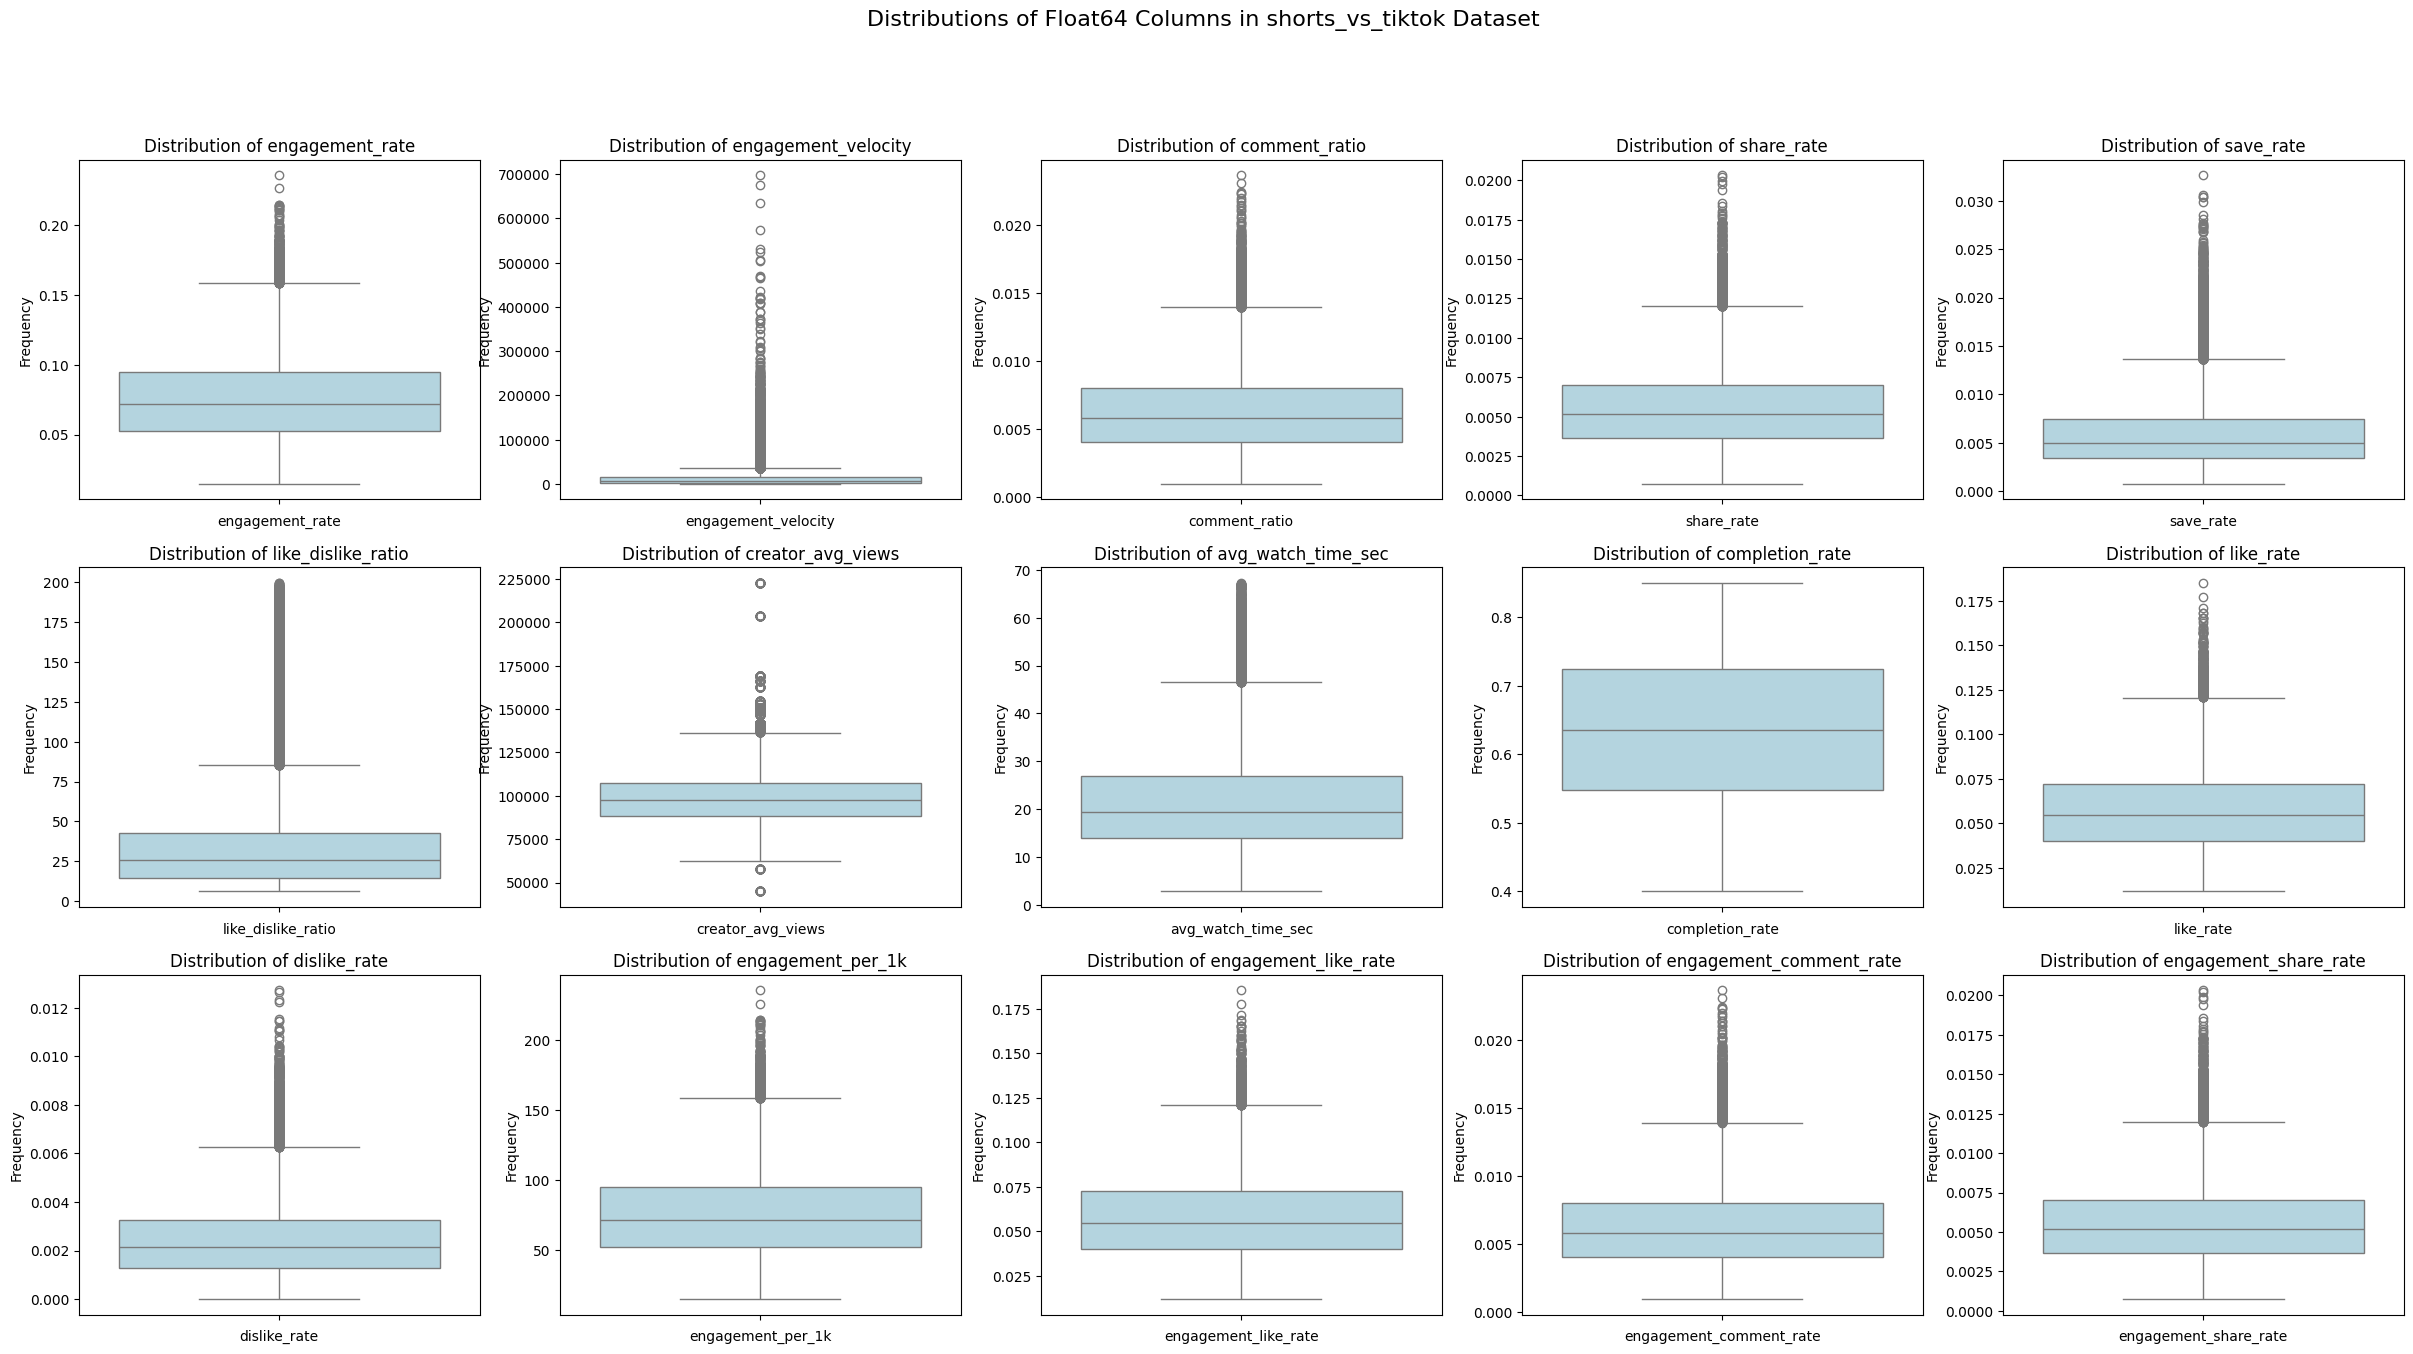

----------------------------------------------------------------

Displaying the distribution of float64 columns in top_creators dataset.


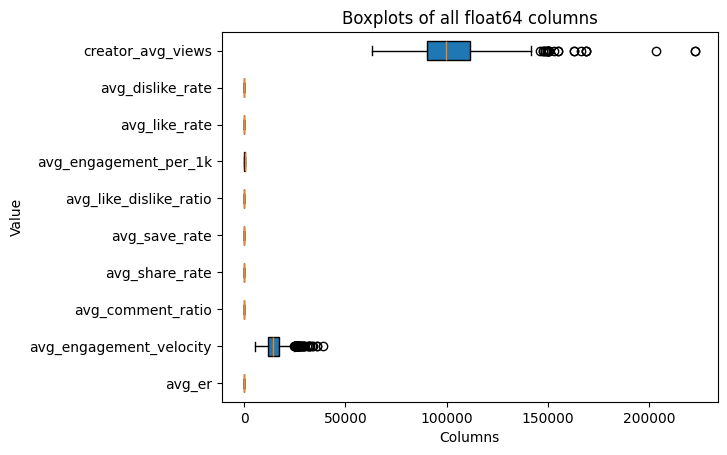

There are 10 float64 columns in the df dataset.


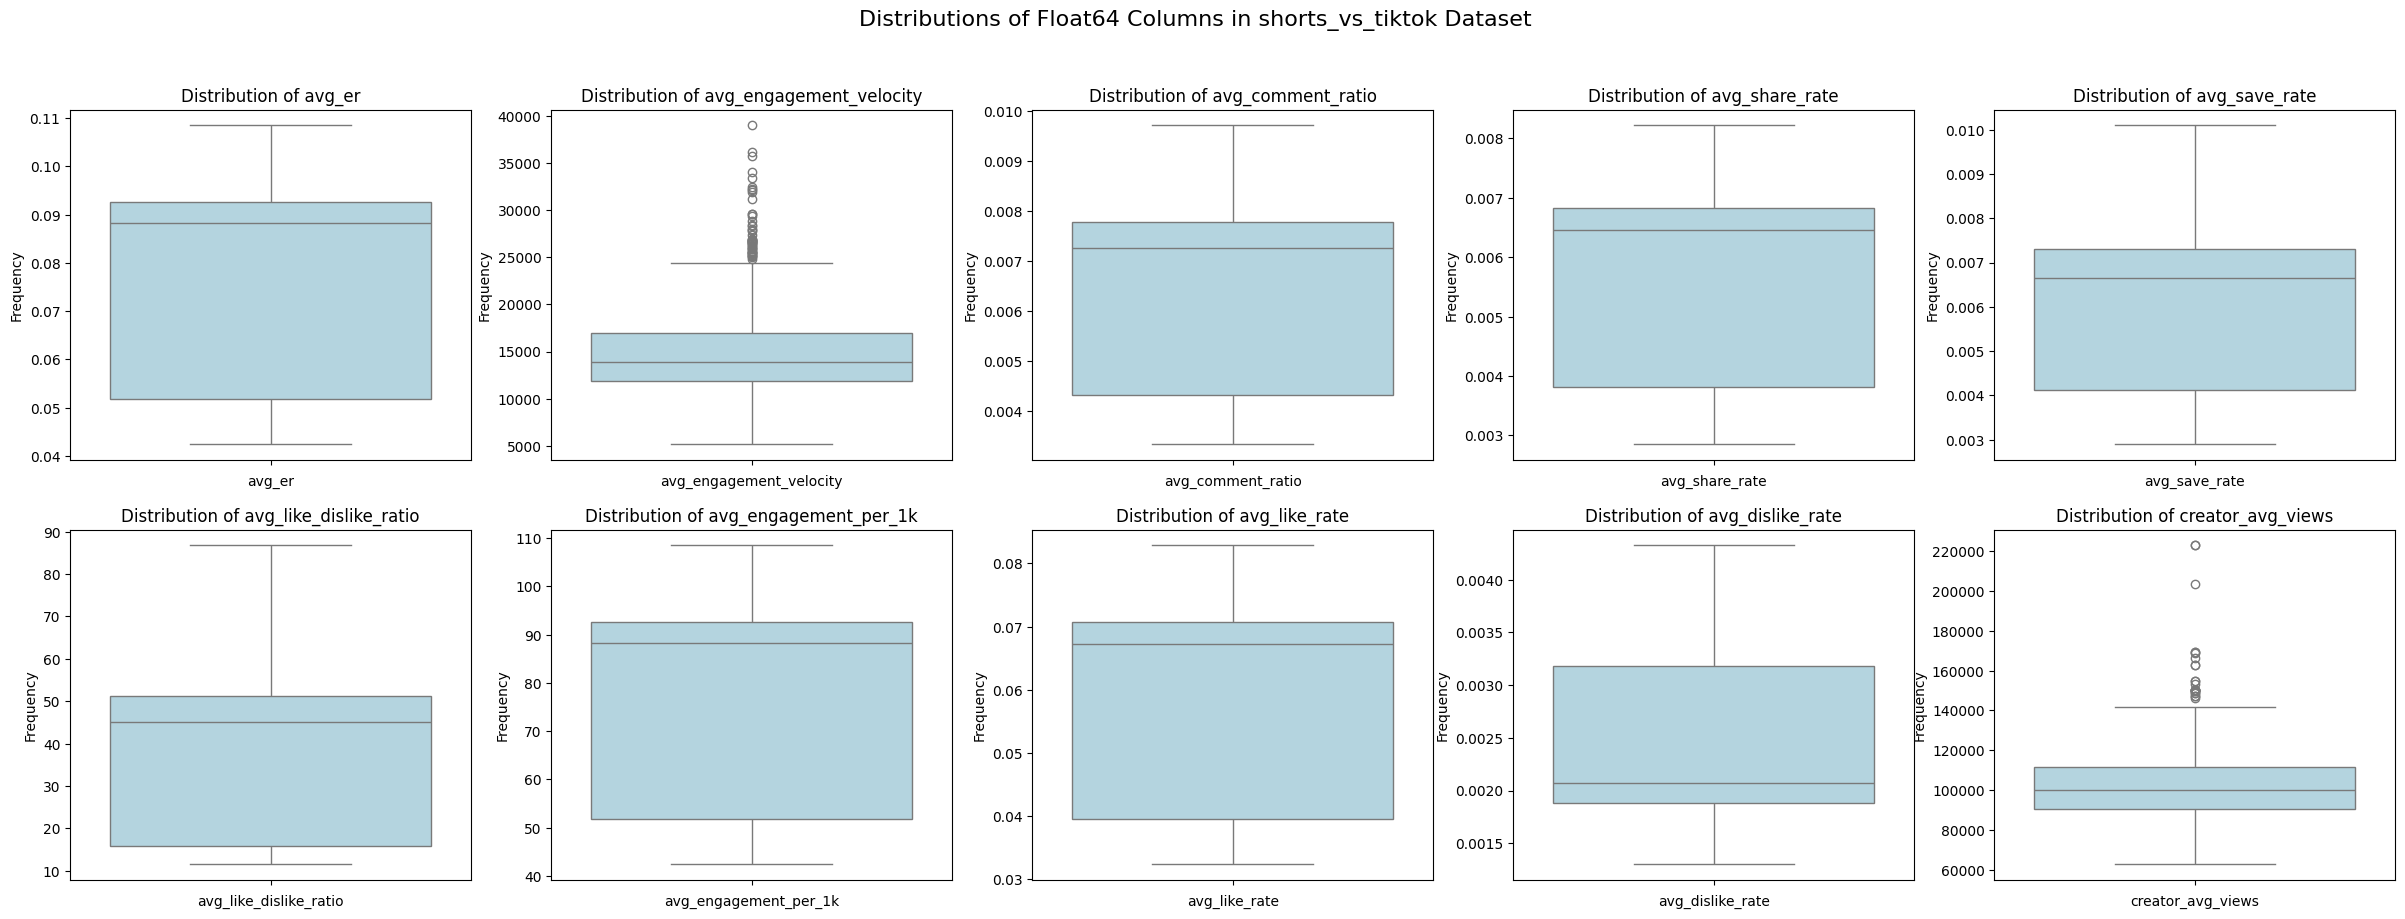

----------------------------------------------------------------

Displaying the distribution of float64 columns in top_hashtags dataset.


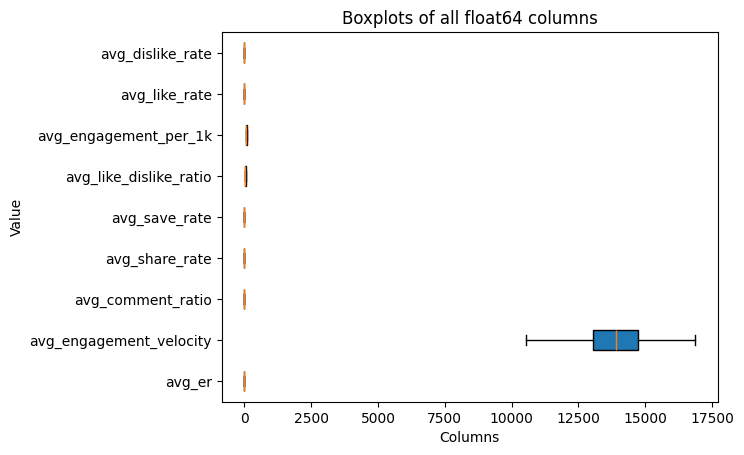

There are 9 float64 columns in the df dataset.


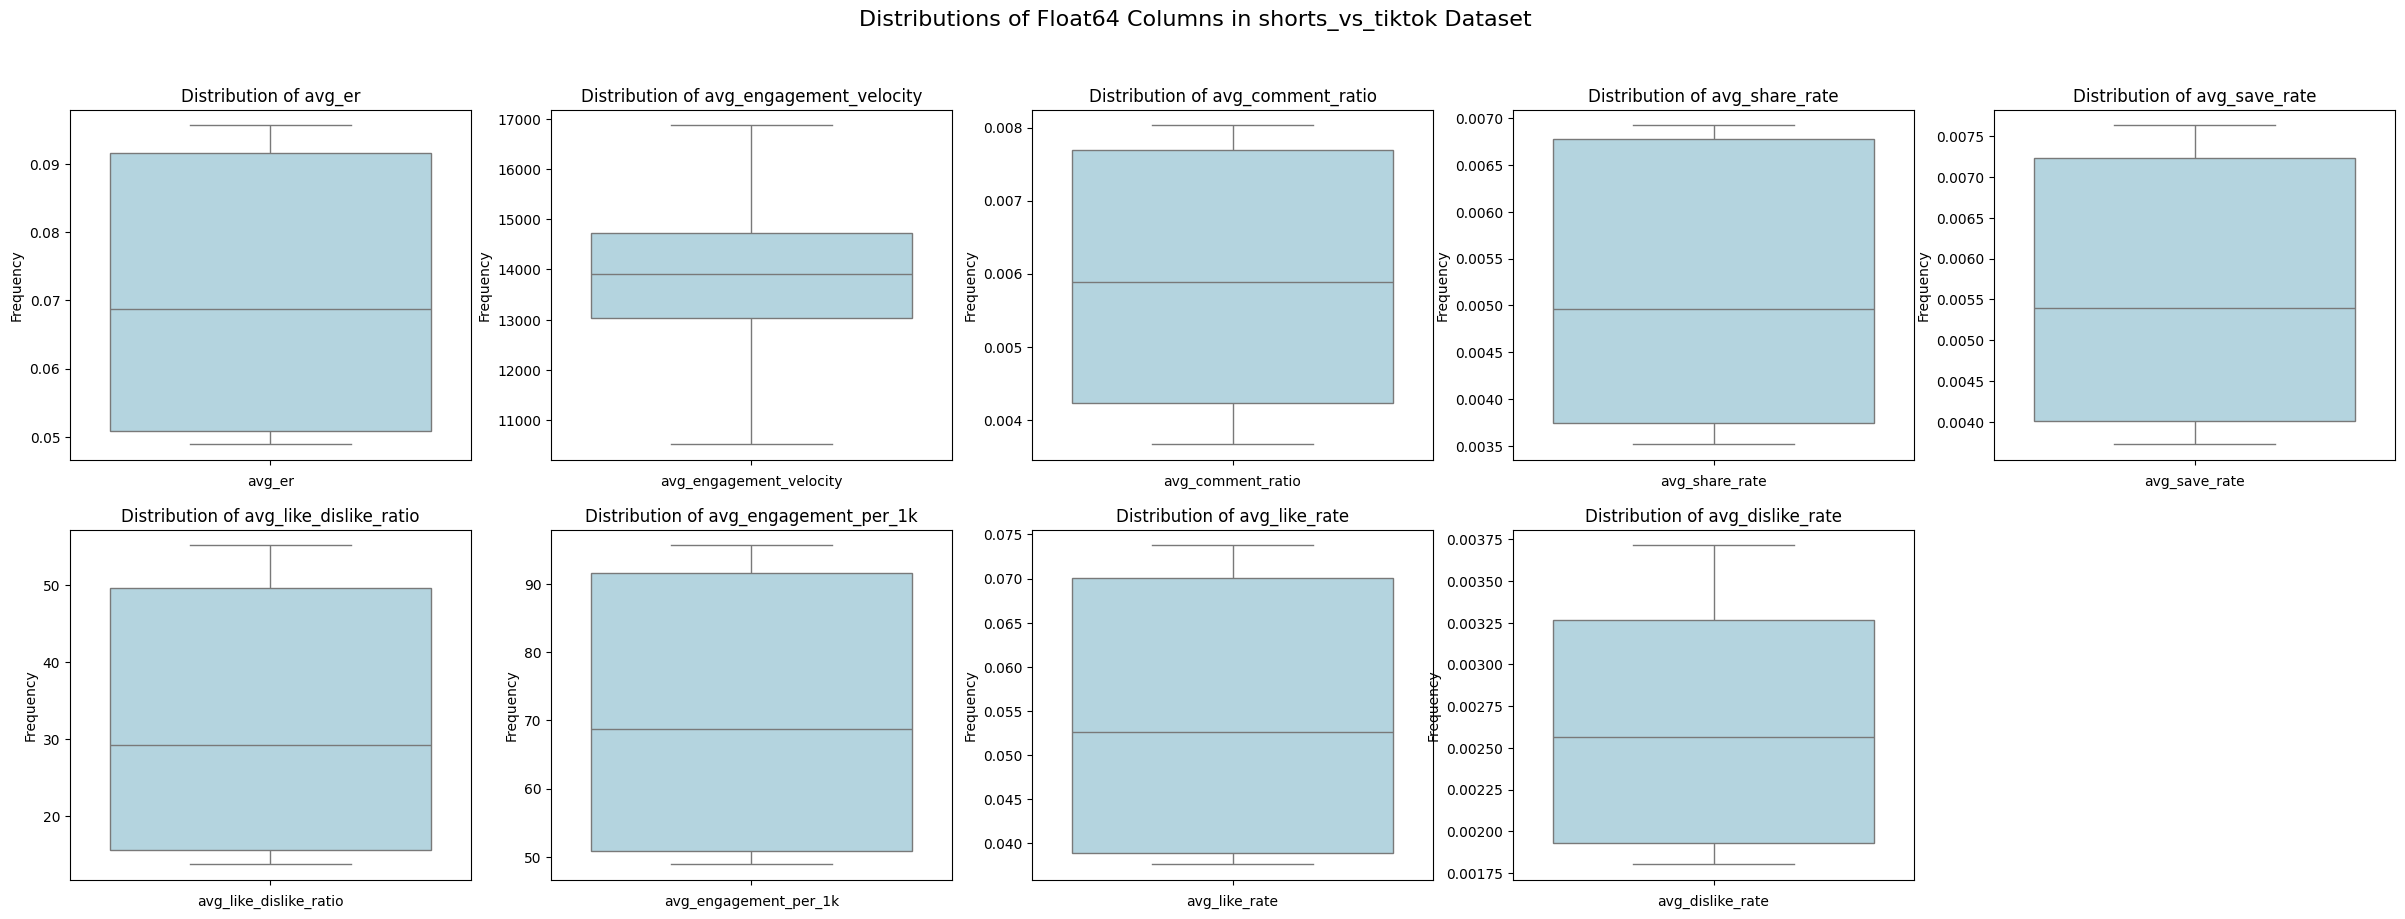

----------------------------------------------------------------

Displaying the distribution of float64 columns in monthly_trends dataset.


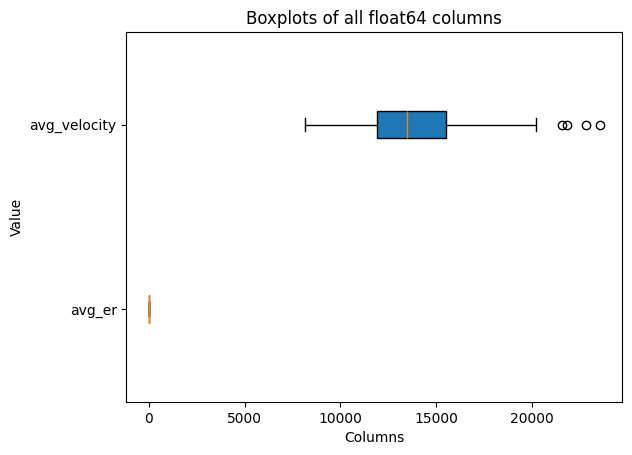

There are 2 float64 columns in the df dataset.


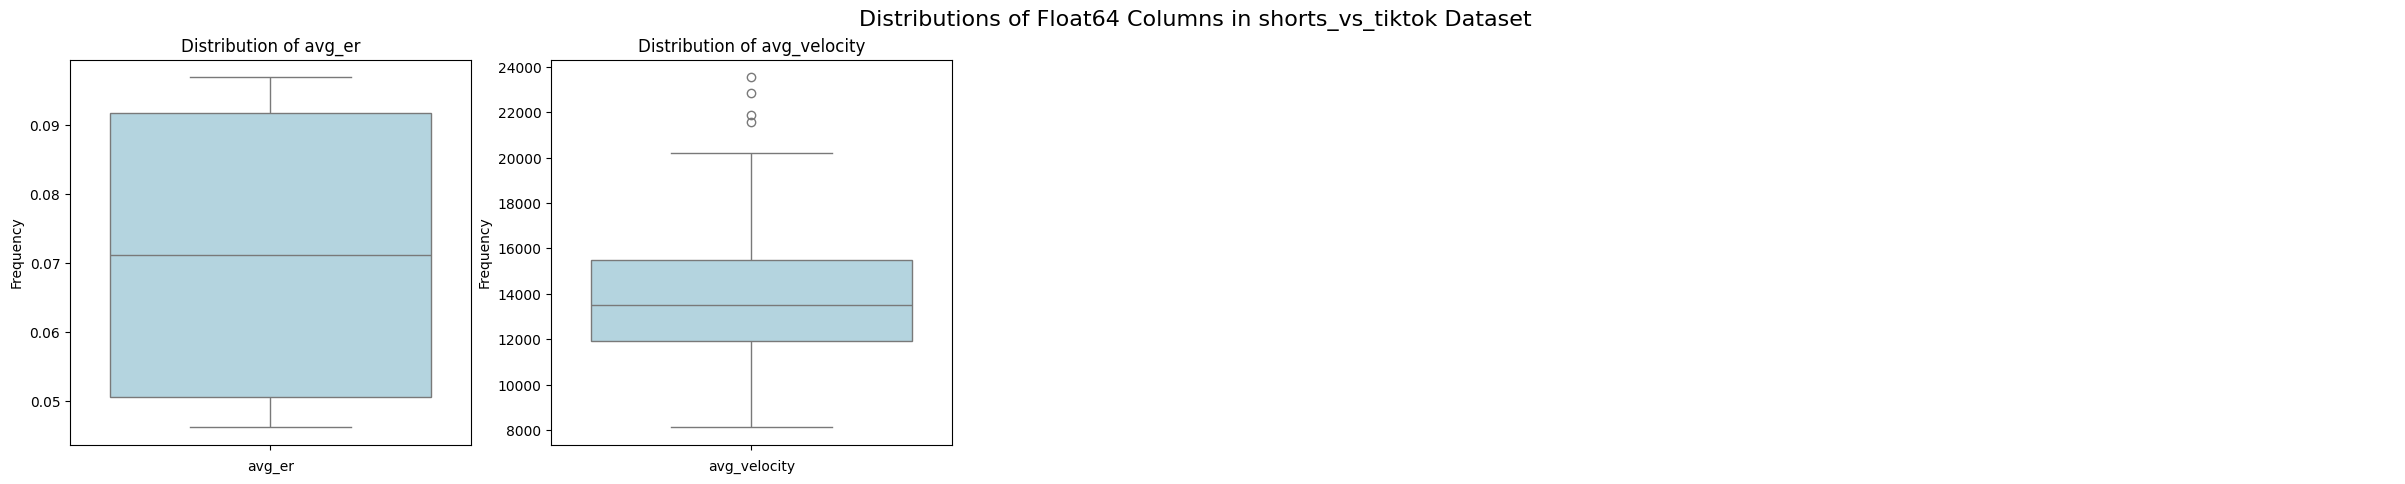

----------------------------------------------------------------

Displaying the distribution of float64 columns in platform_summary dataset.


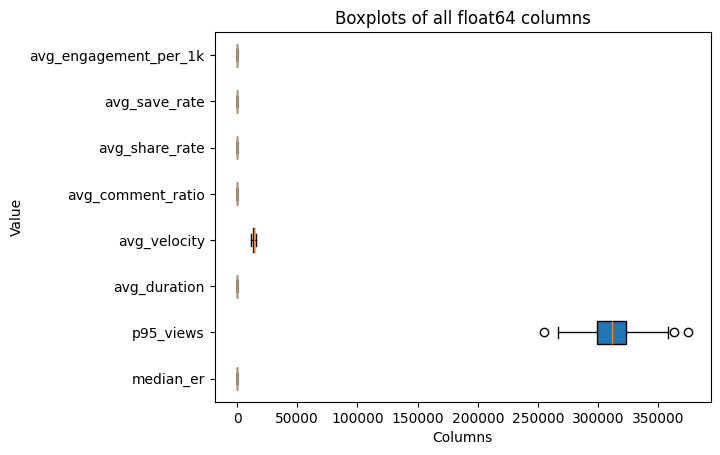

There are 8 float64 columns in the df dataset.


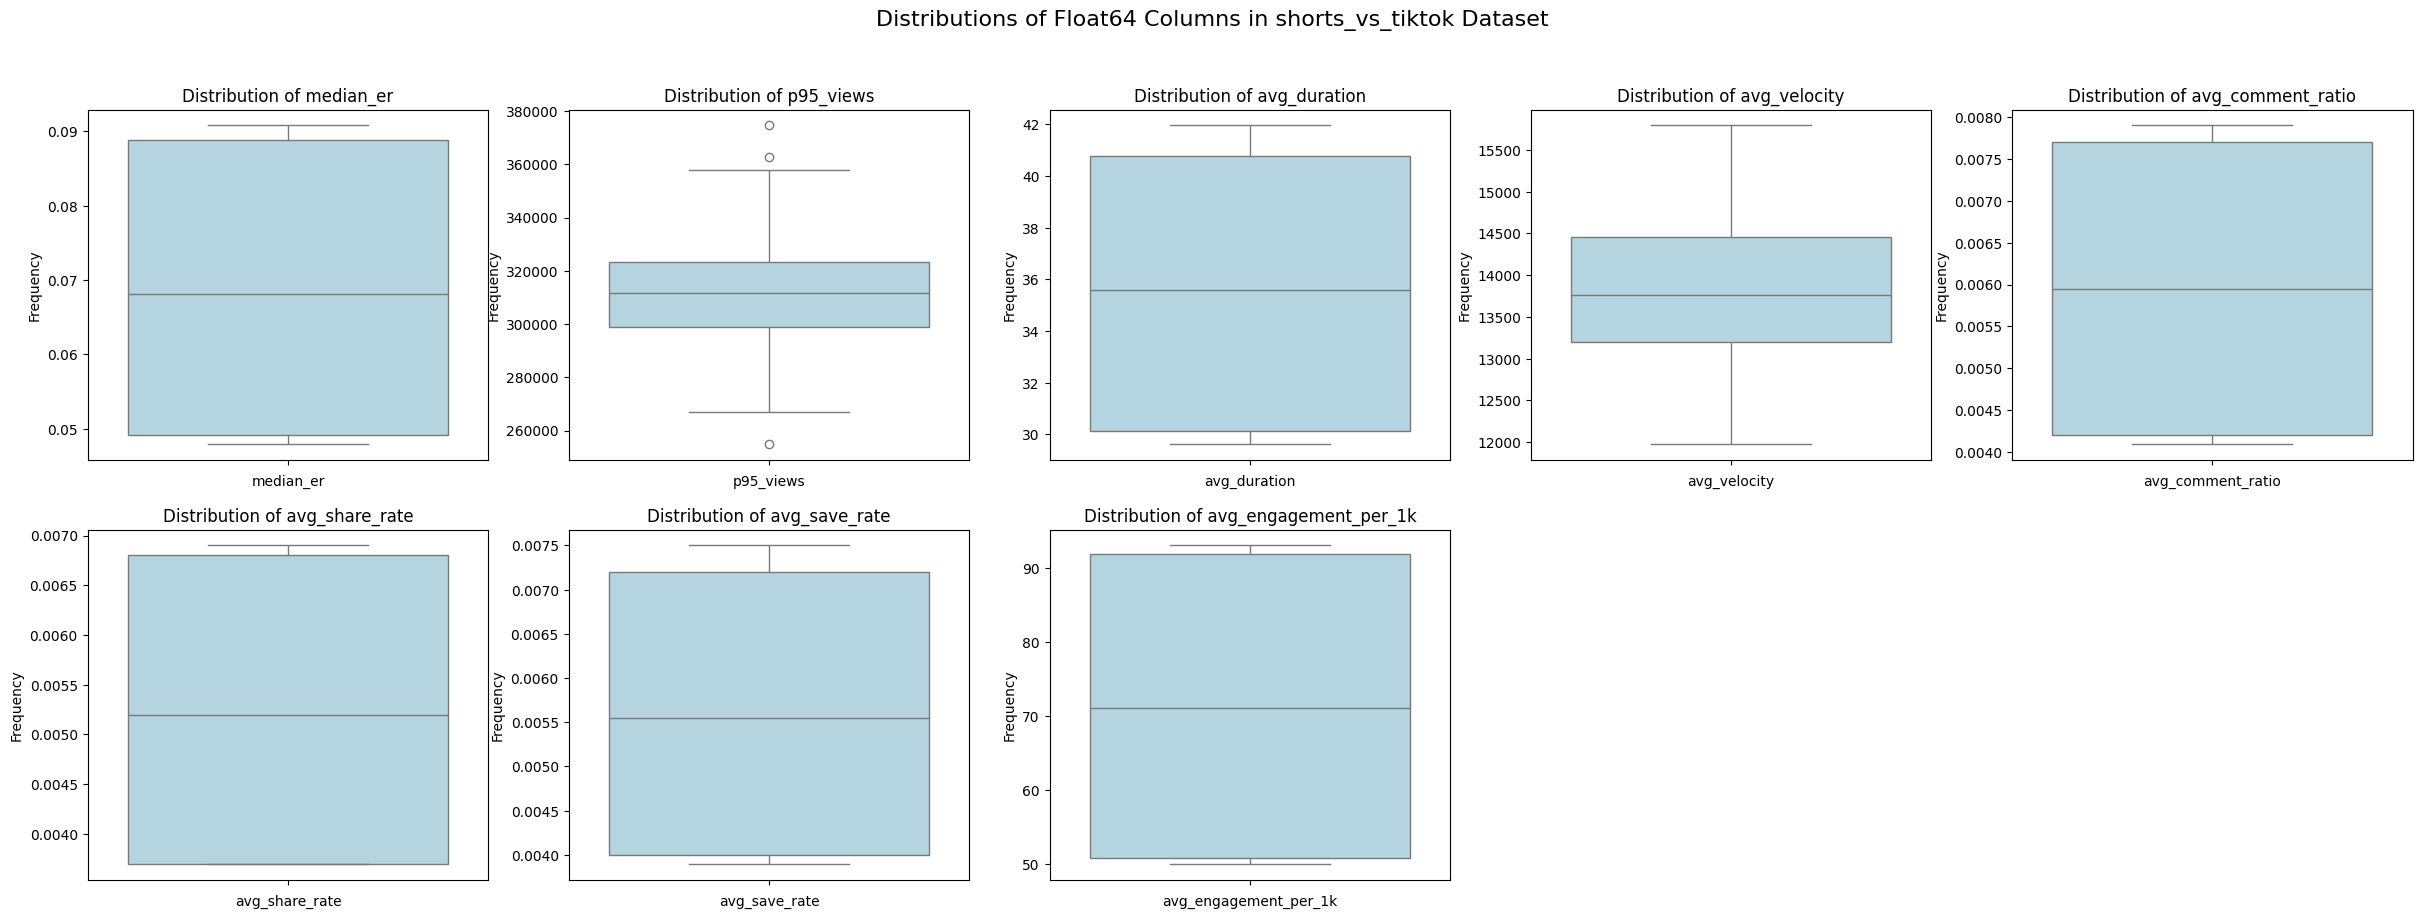

----------------------------------------------------------------



In [108]:
# Distribution of float64 columns   
float64_distribution(shorts_vs_tiktok, 5, 'shorts_vs_tiktok')
float64_distribution(top_creators, 5, 'top_creators')
float64_distribution(top_hashtags, 5, 'top_hashtags')
float64_distribution(monthly_trends, 5, 'monthly_trends')
float64_distribution(platform_summary, 5, 'platform_summary')


In [109]:
datasets = {
    'monthly_trends': pl.read_csv('Dataset/monthly_trends_2025.csv'),
    'top_creators': pl.read_csv('Dataset/top_creators_impact_2025.csv'),
    'top_hashtags': pl.read_csv('Dataset/top_hashtags_2025.csv'),
    'shorts_vs_tiktok': pl.read_csv('Dataset/youtube_shorts_tiktok_trends_2025.csv'),
    'platform_summary': pl.read_csv('Dataset/country_platform_summary_2025.csv'),
    'Data_dictionary': pl.read_csv('Dataset/DATA_DICTIONARY.csv')
}
data_dict = datasets['Data_dictionary'].sort('column')

columns_to_check = data_dict['column'].to_list()
description_to_add = data_dict['description'].to_list()

# Create a dictionary to hold the results
summary_data = {dataset_name: [] for dataset_name in datasets.keys()}

for col in columns_to_check:
    for dataset_name, df in datasets.items():
        # Check if the column exists in the current DataFrame
        if col in df.columns:
            summary_data[dataset_name].append('‚úì')
        else:
            summary_data[dataset_name].append('') # Empty string for better visualization

# Add the columns to check as a list in the summary data
summary_data['Column Name'] = columns_to_check
summary_data['Description'] = description_to_add

# Convert the summary data to a Polars DataFrame
summary_table = pl.DataFrame(summary_data)

# Reorder the columns so that 'Column Name' is first
ordered_cols = ['Column Name'] + list(datasets.keys()) + ['Description']
summary_table = summary_table.select(ordered_cols)

# Display the final table
with pl.Config(tbl_rows=-1, tbl_cols=-1, fmt_str_lengths=200):
    display(summary_table)


shape: (58, 8)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Column     ‚îÜ monthly_tr ‚îÜ top_creato ‚îÜ top_hasht ‚îÜ shorts_vs ‚îÜ platform_ ‚îÜ Data_dict ‚îÜ Descripti ‚îÇ
‚îÇ Name       ‚îÜ ends       ‚îÜ rs         ‚îÜ ags       ‚îÜ _tiktok   ‚îÜ summary   ‚îÜ ionary    ‚îÜ on        ‚îÇ
‚îÇ ---        ‚îÜ ---        ‚îÜ ---        ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÜ ---       ‚îÇ
‚îÇ str        ‚îÜ str        ‚îÜ str        ‚îÜ str       ‚îÜ str       ‚îÜ str       ‚îÜ str       ‚îÜ str       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ author_han ‚îÜ            ‚îÜ ‚úì          ‚îÜ           ‚îÜ ‚úì         ‚îÜ           ‚îÜ           ‚îÜ Creator   ‚îÇ
‚îÇ dle        ‚îÜ            ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ handle/ch ‚îÇ
‚îÇ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ annel (br ‚îÇ
‚îÇ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ and-like, ‚îÇ
‚îÇ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ synthetic ‚îÇ
‚îÇ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ )         ‚îÇ
‚îÇ avg_watch_ ‚îÜ            ‚îÜ            ‚îÜ           ‚îÜ ‚úì         ‚îÜ           ‚îÜ           ‚îÜ Estimated ‚îÇ
‚îÇ time_sec   ‚îÜ            ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ average   ‚îÇ
‚îÇ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ watch     ‚îÇ
‚îÇ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ time      ‚îÇ
‚îÇ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ (seconds) ‚îÇ
‚îÇ category   ‚îÜ            ‚îÜ            ‚îÜ           ‚îÜ ‚úì         ‚îÜ           ‚îÜ           ‚îÜ Video     ‚îÇ
‚îÇ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ category  ‚îÇ
‚îÇ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ (if avail ‚îÇ
‚îÇ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ able)     ‚îÇ
‚îÇ comment_ra ‚îÜ            ‚îÜ            ‚îÜ           ‚îÜ ‚úì         ‚îÜ           ‚îÜ           ‚îÜ comments  ‚îÇ
‚îÇ tio        ‚îÜ            ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ / views   ‚îÇ
‚îÇ comments   ‚îÜ            ‚îÜ            ‚îÜ ‚úì         ‚îÜ ‚úì         ‚îÜ           ‚îÜ           ‚îÜ Comments  ‚îÇ
‚îÇ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ count     ‚îÇ
‚îÇ completion ‚îÜ            ‚îÜ            ‚îÜ           ‚îÜ ‚úì         ‚îÜ           ‚îÜ           ‚îÜ avg_watch ‚îÇ
‚îÇ _rate      ‚îÜ            ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ _time_sec ‚îÇ
‚îÇ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ / duratio ‚îÇ
‚îÇ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ n_sec     ‚îÇ
‚îÇ country    ‚îÜ ‚úì          ‚îÜ            ‚îÜ           ‚îÜ ‚úì         ‚îÜ ‚úì         ‚îÜ           ‚îÜ Country   ‚îÇ
‚îÇ            ‚îÜ           

Top 10 most engagemen profiles?

In [110]:
display(shorts_vs_tiktok.head(5))

shape: (5, 58)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ platform ‚îÜ country ‚îÜ region  ‚îÜ language ‚îÜ ‚Ä¶ ‚îÜ engagement_ ‚îÜ engagement ‚îÜ engagement ‚îÜ engagement ‚îÇ
‚îÇ ---      ‚îÜ ---     ‚îÜ ---     ‚îÜ ---      ‚îÜ   ‚îÜ per_1k      ‚îÜ _like_rate ‚îÜ _comment_r ‚îÜ _share_rat ‚îÇ
‚îÇ str      ‚îÜ str     ‚îÜ str     ‚îÜ str      ‚îÜ   ‚îÜ ---         ‚îÜ ---        ‚îÜ ate        ‚îÜ e          ‚îÇ
‚îÇ          ‚îÜ         ‚îÜ         ‚îÜ          ‚îÜ   ‚îÜ f64         ‚îÜ f64        ‚îÜ ---        ‚îÜ ---        ‚îÇ
‚îÇ          ‚îÜ         ‚îÜ         ‚îÜ          ‚îÜ   ‚îÜ             ‚îÜ            ‚îÜ f64        ‚îÜ f64        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ TikTok   ‚îÜ Jp      ‚îÜ Asia    ‚îÜ ja       ‚îÜ ‚Ä¶ ‚îÜ 120.069     ‚îÜ 0.086159   ‚îÜ 0.012555   ‚îÜ 0.00783    ‚îÇ
‚îÇ TikTok   ‚îÜ Se      ‚îÜ Europe  ‚îÜ sv       ‚îÜ ‚Ä¶ ‚îÜ 113.005     ‚îÜ 0.085298   ‚îÜ 0.00785    ‚îÜ 0.007791   ‚îÇ
‚îÇ TikTok   ‚îÜ Za      ‚îÜ Africa  ‚îÜ en       ‚îÜ ‚Ä¶ ‚îÜ 68.111      ‚îÜ 0.049154   ‚îÜ 0.004469   ‚îÜ 0.005146   ‚îÇ
‚îÇ TikTok   ‚îÜ Kr      ‚îÜ Asia    ‚îÜ ko       ‚îÜ ‚Ä¶ ‚îÜ 108.156     ‚îÜ 0.086257   ‚îÜ 0.011205   ‚îÜ 0.005292   ‚îÇ
‚îÇ TikTok   ‚îÜ Au      ‚îÜ Oceania ‚îÜ en       ‚îÜ ‚Ä¶ ‚îÜ 72.4        ‚îÜ 0.051441   ‚îÜ 0.004204   ‚îÜ 0.004142   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [111]:
#Top 10 most engagemen profiles?
data_temp = datasets['shorts_vs_tiktok']

creator_engagement = data_temp.group_by("author_handle").agg(
    pl.sum("engagement_total").alias("total_engagement")
)

top_10_profiles = creator_engagement.sort("total_engagement", descending=True).head(10)

print(top_10_profiles)

shape: (10, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ author_handle ‚îÜ total_engagement ‚îÇ
‚îÇ ---           ‚îÜ ---              ‚îÇ
‚îÇ str           ‚îÜ i64              ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ UrbanVision   ‚îÜ 2081697          ‚îÇ
‚îÇ StreetVision  ‚îÜ 2021572          ‚îÇ
‚îÇ NextMedia     ‚îÜ 1898773          ‚îÇ
‚îÇ BeyondStudio  ‚îÜ 1889351          ‚îÇ
‚îÇ VividWorks    ‚îÜ 1867868          ‚îÇ
‚îÇ VividLabs     ‚îÜ 1755279          ‚îÇ
‚îÇ BeyondHub     ‚îÜ 1750789          ‚îÇ
‚îÇ PrimeMedia    ‚îÜ 1749156          ‚îÇ
‚îÇ UrbanWorks    ‚îÜ 1721158          ‚îÇ
‚îÇ NextVision    ‚îÜ 1711332          ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


shape: (10, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ hashtag         ‚îÜ total_views ‚îÜ total_likes ‚îÇ
‚îÇ ---             ‚îÜ ---         ‚îÜ ---         ‚îÇ
‚îÇ str             ‚îÜ i64         ‚îÜ i64         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ #FYP            ‚îÜ 1183328006  ‚îÜ 67895369    ‚îÇ
‚îÇ #GRWM           ‚îÜ 169284504   ‚îÜ 9754921     ‚îÇ
‚îÇ #Music          ‚îÜ 126266286   ‚îÜ 7108053     ‚îÇ
‚îÇ #Lifestyle      ‚îÜ 123870251   ‚îÜ 7146446     ‚îÇ
‚îÇ #Relatable      ‚îÜ 123550931   ‚îÜ 7158596     ‚îÇ
‚îÇ #Comedy         ‚îÜ 122338553   ‚îÜ 7381913     ‚îÇ
‚îÇ #Dance          ‚îÜ 120338073   ‚îÜ 6925571     ‚îÇ
‚îÇ #DanceChallenge ‚îÜ 118139016   ‚îÜ 7021841     ‚îÇ
‚îÇ #Cover          ‚îÜ 117436369   ‚îÜ 6695330     ‚îÇ
‚îÇ #MorningRoutine ‚îÜ 11478

/var/folders/ls/wy4qgx7s13s6gz_y3b3x_xv80000gn/T/ipykernel_97758/1185815296.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_10_profiles['hashtag'], rotation=45, ha='right')


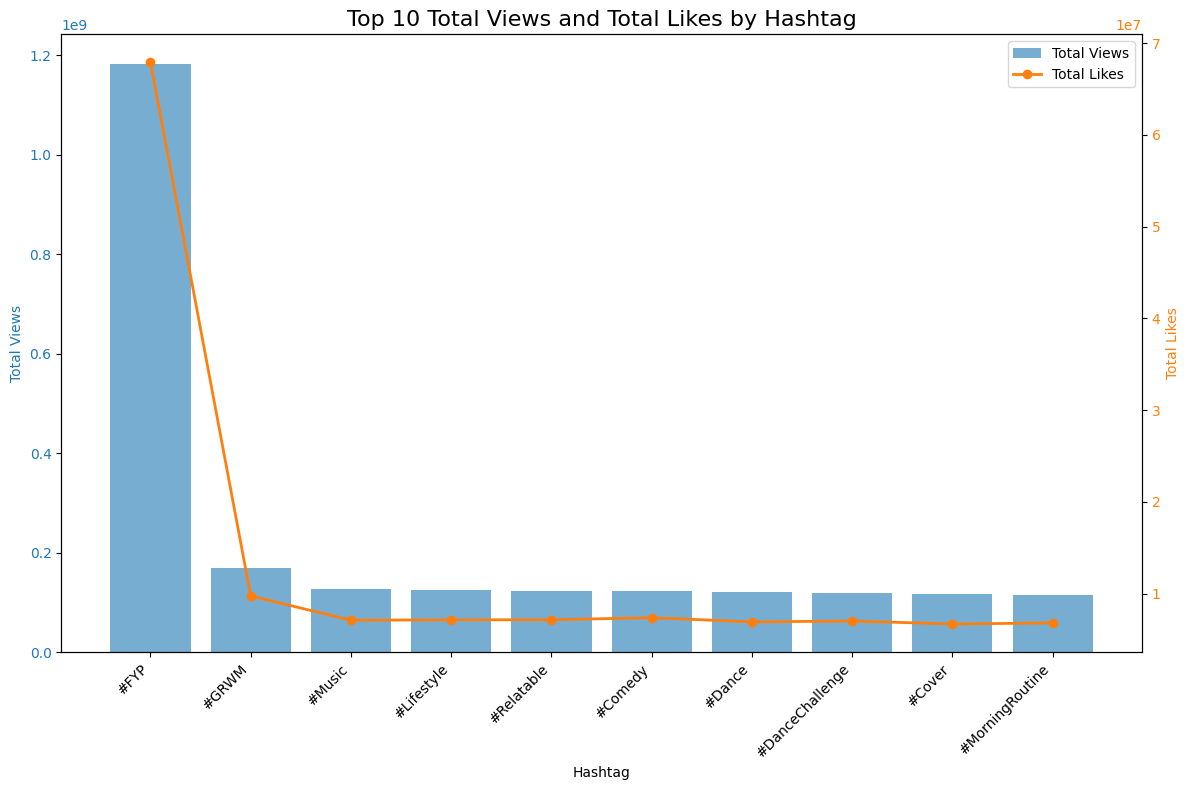

In [112]:
#Top 10 hastags with most views?
data_temp = datasets['shorts_vs_tiktok']

creator_engagement = data_temp.group_by("hashtag").agg(
    pl.sum("views").alias("total_views"),
    pl.sum("likes").alias("total_likes")
)

top_10_profiles = creator_engagement.sort("total_views", descending=True).head(10)

print(top_10_profiles)

# Create the figure and the first axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot 'total_views' on the first axis as a bar chart
color1 = 'tab:blue'
ax1.set_xlabel('Hashtag')
ax1.set_ylabel('Total Views', color=color1)
ax1.bar(top_10_profiles['hashtag'], top_10_profiles['total_views'], color=color1, alpha=0.6, label='Total Views')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticklabels(top_10_profiles['hashtag'], rotation=45, ha='right')

# Create a second axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot 'total_likes' on the second axis as a line plot
color2 = 'tab:orange'
ax2.set_ylabel('Total Likes', color=color2)
ax2.plot(top_10_profiles['hashtag'], top_10_profiles['total_likes'], color=color2, marker='o', linestyle='-', linewidth=2, label='Total Likes')
ax2.tick_params(axis='y', labelcolor=color2)

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Top 10 Total Views and Total Likes by Hashtag', fontsize=16)
plt.tight_layout()
plt.show()


In [113]:
# Trend Identification & Analysis
# data_temp = datasets['shorts_vs_tiktok']
# display(data_temp['trend_label'].unique())

views_videos = data_temp.group_by("country","platform").agg(
    pl.sum("views").alias("total_views"),
    pl.count("row_id").alias("number_of_videos"),
    pl.mean("completion_rate"),
    pl.mean("engagement_rate"),
    pl.mean("engagement_per_1k")
).sort(by=["country","platform"])
display(views_videos.sort(by="total_views", descending=True))

top_youtube = views_videos.filter(pl.col("platform") == "YouTube").sort(by =["total_views","number_of_videos"], descending= True).head(10)
top_tiktok = views_videos.filter(pl.col("platform") == "TikTok").sort(by =["total_views","number_of_videos"], descending= True).head(10)
print("Top 10 each platform by total views")
display(top_youtube)
display(top_tiktok)

print(f"Top 10 country with most views on YouTube Short : {top_youtube['country'].to_list()}")
print(f"Top 10 country with most views on TikTok : {top_tiktok['country'].to_list()}")

shape: (60, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ country ‚îÜ platform ‚îÜ total_views ‚îÜ number_of_vid ‚îÜ completion_ra ‚îÜ engagement_ra ‚îÜ engagement_pe ‚îÇ
‚îÇ ---     ‚îÜ ---      ‚îÜ ---         ‚îÜ eos           ‚îÜ te            ‚îÜ te            ‚îÜ r_1k          ‚îÇ
‚îÇ str     ‚îÜ str      ‚îÜ i64         ‚îÜ ---           ‚îÜ ---           ‚îÜ ---           ‚îÜ ---           ‚îÇ
‚îÇ         ‚îÜ          ‚îÜ             ‚îÜ u32           ‚îÜ f64           ‚îÜ f64           ‚îÜ f64           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Pl      ‚îÜ TikTok   ‚îÜ 104027786   ‚îÜ 993           ‚îÜ 0.672642      ‚îÜ 0.091467      ‚îÜ 91.466592     ‚îÇ
‚îÇ Kr      ‚îÜ TikTok   ‚îÜ 102835042   ‚îÜ 993           ‚îÜ 0.675671      ‚îÜ 0.09156       ‚îÜ 91.560403     ‚îÇ
‚îÇ Ke      ‚îÜ TikTok   ‚îÜ 102219088   ‚îÜ 1033          ‚îÜ 0.674214      ‚îÜ 0.092377      ‚îÜ 92.376854     ‚îÇ
‚îÇ Nl      ‚îÜ TikTok   ‚îÜ 101151851   ‚îÜ 953           ‚îÜ 0.672257      ‚îÜ 0.090206      ‚îÜ 90.206273     ‚îÇ
‚îÇ Es      ‚îÜ TikTok   ‚îÜ 100814252   ‚îÜ 976           ‚îÜ 0.673151      ‚îÜ 0.09196       ‚îÜ 91.960147     ‚îÇ
‚îÇ ‚Ä¶       ‚îÜ ‚Ä¶        ‚îÜ ‚Ä¶           ‚îÜ ‚Ä¶             ‚îÜ ‚Ä¶             ‚îÜ ‚Ä¶             ‚îÜ ‚Ä¶             ‚îÇ
‚îÇ Eg      ‚îÜ YouTube  ‚îÜ 57304484    ‚îÜ 619           ‚îÜ 0.575057      ‚îÜ 0.051426      ‚îÜ 51.42553      ‚îÇ
‚îÇ Jp      ‚îÜ YouTube  ‚îÜ 56248413    ‚îÜ 598           ‚îÜ 0.577617      ‚îÜ 0.050913      ‚îÜ 50.913072     ‚îÇ
‚îÇ Ar      ‚îÜ YouTube  ‚îÜ 55961194    ‚îÜ 612           ‚îÜ 0.575969      ‚îÜ 0.050355      ‚îÜ 50.355062     ‚îÇ
‚îÇ Kr      ‚îÜ YouTube  ‚îÜ 55595970    ‚îÜ 610           ‚îÜ 0.580459      ‚îÜ 0.0507        ‚îÜ 50.699561     ‚îÇ
‚îÇ Se      ‚îÜ YouTube  ‚îÜ 55048128    ‚îÜ 625           ‚îÜ 0.5708624     ‚îÜ 0.051182      ‚îÜ 51.181715     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

Top 10 each platform by total views


shape: (10, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ country ‚îÜ platform ‚îÜ total_views ‚îÜ number_of_vid ‚îÜ completion_ra ‚îÜ engagement_ra ‚îÜ engagement_pe ‚îÇ
‚îÇ ---     ‚îÜ ---      ‚îÜ ---         ‚îÜ eos           ‚îÜ te            ‚îÜ te            ‚îÜ r_1k          ‚îÇ
‚îÇ str     ‚îÜ str      ‚îÜ i64         ‚îÜ ---           ‚îÜ ---           ‚îÜ ---           ‚îÜ ---           ‚îÇ
‚îÇ         ‚îÜ          ‚îÜ             ‚îÜ u32           ‚îÜ f64           ‚îÜ f64           ‚îÜ f64           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Ru      ‚îÜ YouTube  ‚îÜ 69669553    ‚îÜ 680           ‚îÜ 0.568363      ‚îÜ 0.050639      ‚îÜ 50.638937     ‚îÇ
‚îÇ Id      ‚îÜ YouTube  ‚îÜ 69548514    ‚îÜ 678           ‚îÜ 0.569614      ‚îÜ 0.051128      ‚îÜ 51.127692     ‚îÇ
‚îÇ Mx      ‚îÜ YouTube  ‚îÜ 69411185    ‚îÜ 707           ‚îÜ 0.571917      ‚îÜ 0.051816      ‚îÜ 51.816057     ‚îÇ
‚îÇ Gb      ‚îÜ YouTube  ‚îÜ 69301389    ‚îÜ 640           ‚îÜ 0.575875      ‚îÜ 0.0502        ‚îÜ 50.200086     ‚îÇ
‚îÇ Br      ‚îÜ YouTube  ‚îÜ 69228673    ‚îÜ 683           ‚îÜ 0.57042       ‚îÜ 0.05012       ‚îÜ 50.119531     ‚îÇ
‚îÇ Ma      ‚îÜ YouTube  ‚îÜ 69189433    ‚îÜ 643           ‚îÜ 0.57649       ‚îÜ 0.051057      ‚îÜ 51.057443     ‚îÇ
‚îÇ Ng      ‚îÜ YouTube  ‚îÜ 69182519    ‚îÜ 673           ‚îÜ 0.579272      ‚îÜ 0.0502        ‚îÜ 50.199975     ‚îÇ
‚îÇ Sa      ‚îÜ YouTube  ‚îÜ 67492748    ‚îÜ 654           ‚îÜ 0.572243      ‚îÜ 0.050826      ‚îÜ 50.826448     ‚îÇ
‚îÇ De      ‚îÜ YouTube  ‚îÜ 67160751    ‚îÜ 642           ‚îÜ 0.57783       ‚îÜ 0.051041      ‚îÜ 51.041111     ‚îÇ
‚îÇ Ke      ‚îÜ YouTube  ‚îÜ 66255437    ‚îÜ 666           ‚îÜ 0.569222      ‚îÜ 0.051469      ‚îÜ 51.469228     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

shape: (10, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ country ‚îÜ platform ‚îÜ total_views ‚îÜ number_of_vid ‚îÜ completion_ra ‚îÜ engagement_ra ‚îÜ engagement_pe ‚îÇ
‚îÇ ---     ‚îÜ ---      ‚îÜ ---         ‚îÜ eos           ‚îÜ te            ‚îÜ te            ‚îÜ r_1k          ‚îÇ
‚îÇ str     ‚îÜ str      ‚îÜ i64         ‚îÜ ---           ‚îÜ ---           ‚îÜ ---           ‚îÜ ---           ‚îÇ
‚îÇ         ‚îÜ          ‚îÜ             ‚îÜ u32           ‚îÜ f64           ‚îÜ f64           ‚îÜ f64           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Pl      ‚îÜ TikTok   ‚îÜ 104027786   ‚îÜ 993           ‚îÜ 0.672642      ‚îÜ 0.091467      ‚îÜ 91.466592     ‚îÇ
‚îÇ Kr      ‚îÜ TikTok   ‚îÜ 102835042   ‚îÜ 993           ‚îÜ 0.675671      ‚îÜ 0.09156       ‚îÜ 91.560403     ‚îÇ
‚îÇ Ke      ‚îÜ TikTok   ‚îÜ 102219088   ‚îÜ 1033          ‚îÜ 0.674214      ‚îÜ 0.092377      ‚îÜ 92.376854     ‚îÇ
‚îÇ Nl      ‚îÜ TikTok   ‚îÜ 101151851   ‚îÜ 953           ‚îÜ 0.672257      ‚îÜ 0.090206      ‚îÜ 90.206273     ‚îÇ
‚îÇ Es      ‚îÜ TikTok   ‚îÜ 100814252   ‚îÜ 976           ‚îÜ 0.673151      ‚îÜ 0.09196       ‚îÜ 91.960147     ‚îÇ
‚îÇ Ar      ‚îÜ TikTok   ‚îÜ 100095356   ‚îÜ 997           ‚îÜ 0.674497      ‚îÜ 0.090229      ‚îÜ 90.228727     ‚îÇ
‚îÇ De      ‚îÜ TikTok   ‚îÜ 99957258    ‚îÜ 946           ‚îÜ 0.677001      ‚îÜ 0.090449      ‚îÜ 90.44899      ‚îÇ
‚îÇ Ae      ‚îÜ TikTok   ‚îÜ 99711690    ‚îÜ 992           ‚îÜ 0.677824      ‚îÜ 0.09243       ‚îÜ 92.42974      ‚îÇ
‚îÇ Ca      ‚îÜ TikTok   ‚îÜ 98768387    ‚îÜ 960           ‚îÜ 0.67586       ‚îÜ 0.092738      ‚îÜ 92.737833     ‚îÇ
‚îÇ Id      ‚îÜ TikTok   ‚îÜ 98461661    ‚îÜ 929           ‚îÜ 0.673517      ‚îÜ 0.091694      ‚îÜ 91.6939       ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

Top 10 country with most views on YouTube Short : ['Ru', 'Id', 'Mx', 'Gb', 'Br', 'Ma', 'Ng', 'Sa', 'De', 'Ke']
Top 10 country with most views on TikTok : ['Pl', 'Kr', 'Ke', 'Nl', 'Es', 'Ar', 'De', 'Ae', 'Ca', 'Id']


In [117]:
rank_view = (
    top_youtube
    .sort("total_views", descending=True)
    .head(6)
    .with_columns(
        (pl.Series(values=range(1, 7))).alias("rank")
    )
    .select(
        pl.col("rank"),
        pl.col("country"),
        pl.col("total_views")
    )
).sort('rank')

rank_completion = (
    top_youtube
    .sort("completion_rate", descending=True)
    .head(6)
    .with_columns(
        (pl.Series(values=range(1, 7))).alias("rank")
    )
    .select(
        pl.col("rank"),
        pl.col("country"),
        pl.col("completion_rate")
    )
)

rank_engagement = (
    top_youtube
    .sort("engagement_rate", descending=True)
    .head(6)
    .with_columns(
        (pl.Series(values=range(1, 7))).alias("rank")
    )
    .select(
        pl.col("rank"),
        pl.col("country"),
        pl.col("engagement_rate")
    )
)

final_table = rank_view.join(rank_completion, on="rank", how="inner", suffix="_completion").join(rank_engagement, on="rank", how="inner", suffix="_engagement")

display(final_table)

shape: (6, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ rank ‚îÜ country ‚îÜ total_views ‚îÜ country_comple ‚îÜ completion_rat ‚îÜ country_engage ‚îÜ engagement_rat ‚îÇ
‚îÇ ---  ‚îÜ ---     ‚îÜ ---         ‚îÜ tion           ‚îÜ e              ‚îÜ ment           ‚îÜ e              ‚îÇ
‚îÇ i64  ‚îÜ str     ‚îÜ i64         ‚îÜ ---            ‚îÜ ---            ‚îÜ ---            ‚îÜ ---            ‚îÇ
‚îÇ      ‚îÜ         ‚îÜ             ‚îÜ str            ‚îÜ f64            ‚îÜ str            ‚îÜ f64            ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 1    ‚îÜ Ru      ‚îÜ 69669553    ‚îÜ Ng             ‚îÜ 0.579272       ‚îÜ Mx             ‚îÜ 0.051816       ‚îÇ
‚îÇ 2    ‚îÜ Id      ‚îÜ 69548514    ‚îÜ De             ‚îÜ 0.57783        ‚îÜ Ke             ‚îÜ 0.051469       ‚îÇ
‚îÇ 3    ‚îÜ Mx      ‚îÜ 69411185    ‚îÜ Ma             ‚îÜ 0.57649        ‚îÜ Id             ‚îÜ 0.051128       ‚îÇ
‚îÇ 4    ‚îÜ Gb      ‚îÜ 69301389    ‚îÜ Gb             ‚îÜ 0.575875       ‚îÜ Ma             ‚îÜ 0.051057       ‚îÇ
‚îÇ 5    ‚îÜ Br      ‚îÜ 69228673    ‚îÜ Sa             ‚îÜ 0.572243       ‚îÜ De             ‚îÜ 0.051041       ‚îÇ
‚îÇ 6    ‚îÜ Ma      ‚îÜ 69189433    ‚îÜ Mx             ‚îÜ 0.571917       ‚îÜ Sa             ‚îÜ 0.050826       ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

The most promising country is Mx with the third in total views, the sixth in completion rate, and the first in engagement_rate. Mexico is the most healthy and active.
Russia and Indonesia are the top active market, while the United Kingdom is the market with large scale and high content retention quality. These are good in size and consumption volume.
With the most completetion rate, Nigeria is the top-tier for market quality. 


Working...